<a href="https://colab.research.google.com/github/zhafirahra/uber_taxi_fare/blob/main/Uber_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding

💼 Business Context

Uber Inc., sebagai salah satu perusahaan transportasi berbasis aplikasi terbesar di dunia, melayani jutaan pelanggan setiap harinya. Dengan skala operasional yang sangat besar, pengelolaan dan pemanfaatan data perjalanan menjadi hal yang krusial untuk menunjang efisiensi dan pengambilan keputusan bisnis yang lebih baik. Salah satu komponen utama dalam layanan Uber adalah fare amount atau tarif perjalanan, yang sangat dipengaruhi oleh berbagai faktor seperti jarak, waktu, dan jumlah penumpang.

🎯 Business Problem

Variasi harga tarif perjalanan yang tidak konsisten atau tidak akurat dapat berdampak langsung terhadap kepuasan pelanggan, persepsi keadilan harga, dan bahkan strategi pemasaran serta penetapan harga dinamis Uber. Oleh karena itu, perusahaan membutuhkan model prediktif yang dapat memperkirakan tarif secara akurat sebelum perjalanan dilakukan, berdasarkan informasi yang tersedia saat pemesanan.

🧭 Project Goals

1. Memprediksi Tarif Perjalanan Uber (fare_amount): <br>
    Menggunakan data historis perjalanan Uber untuk membangun model prediktif berbasis regresi yang mampu memperkirakan tarif perjalanan secara akurat.

2. Mengidentifikasi Faktor-Faktor Penting yang Mempengaruhi Tarif: <br>
    Memahami hubungan antara lokasi penjemputan, lokasi penurunan, jumlah penumpang, serta waktu perjalanan terhadap besarnya tarif.

3. Meningkatkan Efisiensi dan Keputusan Bisnis:<br>
    Model prediksi tarif ini dapat digunakan untuk meningkatkan transparansi harga, pengambilan keputusan berbasis data, dan mendukung inisiatif lain seperti fare recommendation, fraud detection, dan customer segmentation.

🧪 Analytical Approach

1. Melakukan pembersihan dan eksplorasi data untuk memahami pola umum dan outlier.

2. Membangun beberapa model regresi (seperti Linear Regression, Decision Tree, Random Forest, dan Gradient Boosting) untuk memperkirakan fare_amount.

3. Mengevaluasi model menggunakan metrik performa seperti R², RMSE, dan MAE untuk membandingkan akurasi dan efisiensi model.

🧾 Deliverables

    Model prediksi tarif perjalanan Uber.

    Analisis fitur yang berpengaruh terhadap tarif.

    Evaluasi dan perbandingan performa model.

    Insight dan rekomendasi bisnis berbasis hasil model.

# Data Understanding & EDA Awal

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
#Membaca file CSV
df = pd.read_csv('uber.csv')

In [ ]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


1.  Kolom `pickup_datetime` menyimpan informasi tersembunyi yang sangat berguna. Ketika dipecah (extract) waktu menjadi fitur-fitur seperti:

  * hour
  * day
  * month
  * years
  
  maka kita bisa membantu model mempelajari pola tarif berdasarkan waktu.

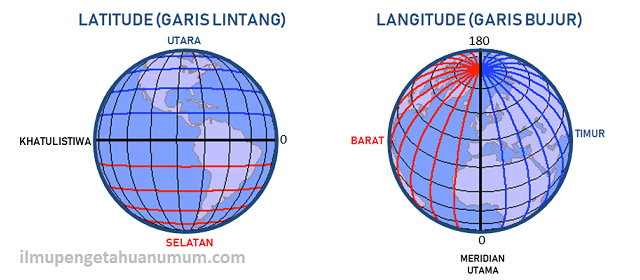

In [ ]:
#Mengecek berapa baris dan kolom dataset
df.shape

(200000, 9)

In [ ]:
#Menghapus kolum yang tidak relevan / tidak dibutuhkan
df = df.drop(['Unnamed: 0' , 'key'], axis = 1)

Alasan Menghapus Kolom `Unnamed: 0` dan `key`

- `Unnamed: 0`:
  - Hanya index lama dari Pandas yang ikut tersimpan saat export ke CSV.
  - Isinya cuma nomor urut baris, nggak punya arti atau pola yang bisa dipakai model.
  - Nggak membantu untuk analisis atau prediksi, jadi lebih baik dihapus.

- `key`:
  - Isinya timestamp waktu penjemputan (pickup time), tapi formatnya kurang rapi.
  - Data yang sama sudah ada di kolom `pickup_datetime` dengan format yang lebih jelas.
  - Menyimpan dua kolom yang isinya mirip bisa bikin data jadi redundan (dobel).
  - Supaya nggak membingungkan model, kolom ini juga dihapus.

Intinya, kedua kolom ini nggak punya nilai tambah buat proses analisis atau machine learning, jadi lebih baik dibuang supaya data lebih bersih dan fokus.


In [ ]:
#Mengecek tipe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
#Mengecek missing value / NaN Value
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
#untuk melihat ringkasan statistik awal dari kolom-kolom numerik dalam DataFrame
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
#Mengkstrak tanggal dan waktu dari kolom pickup_datetime (YYYY-MM-DD)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

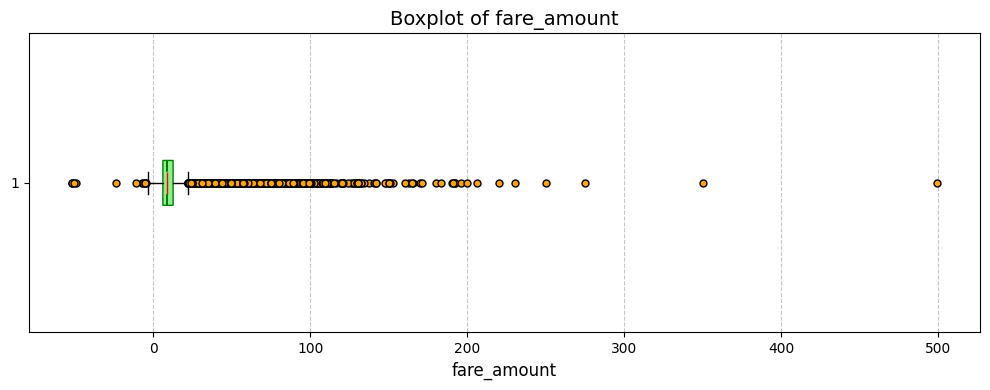

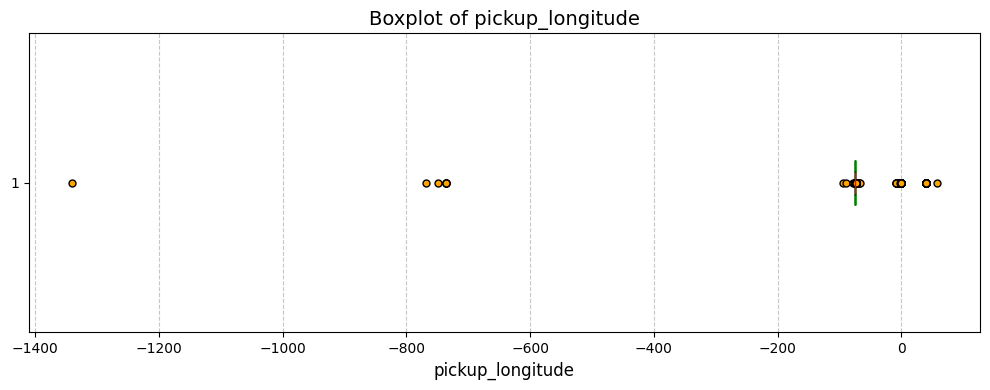

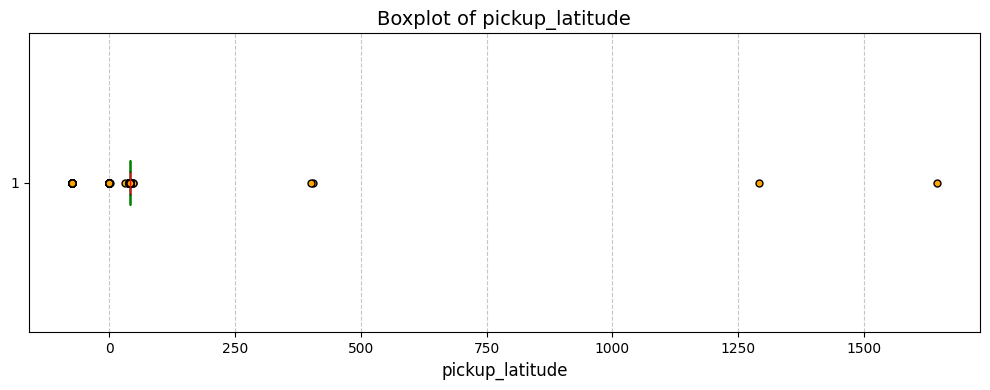

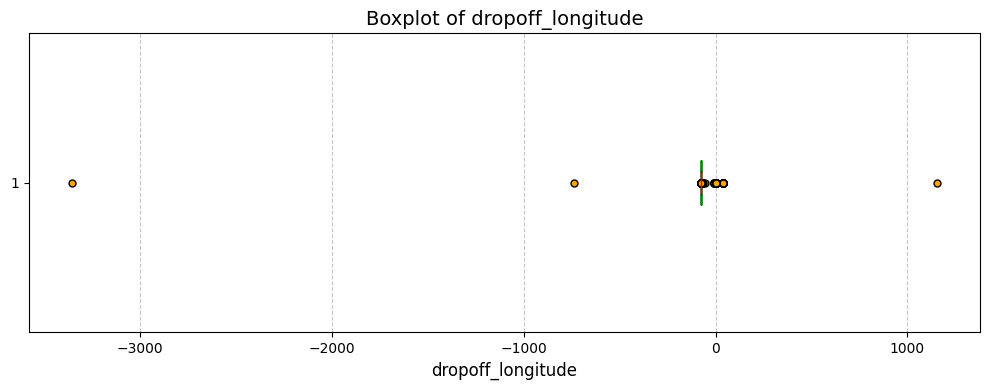

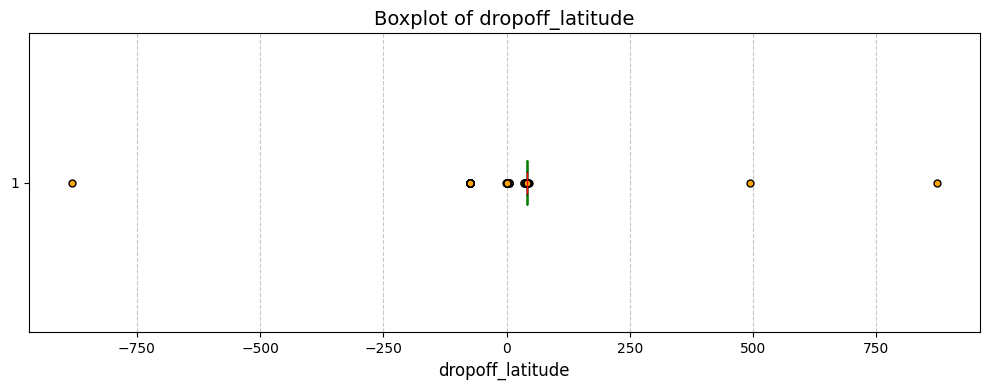

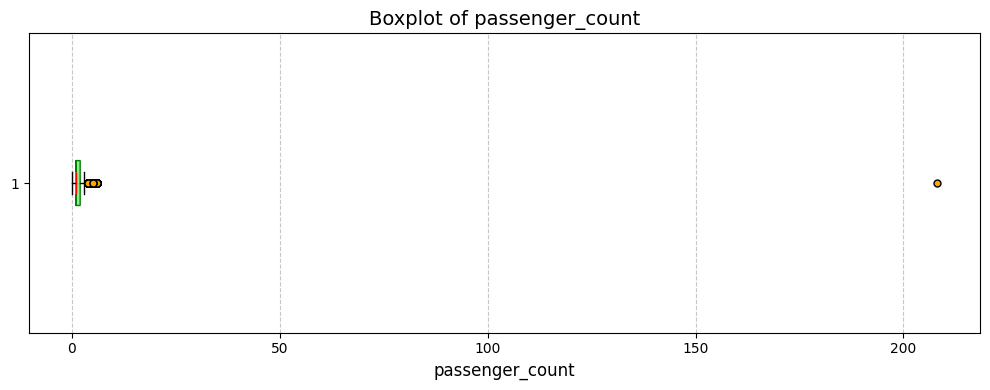

In [ ]:
import matplotlib.pyplot as plt

# Pilih kolom numerik
num_col = df.select_dtypes(include=['int64', 'float64'])

# Boxplot horizontal untuk setiap kolom numerik
for col in num_col.columns:
    plt.figure(figsize=(10, 4))  # Lebar diperbesar untuk horizontal
    plt.boxplot(df[col].dropna(),
                vert=False,                  # Horizontal
                patch_artist=True,
                notch=True,
                boxprops=dict(facecolor='lightgreen', color='green'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid horizontal (karena orientasi horizontal)
    plt.tight_layout()
    plt.show()


In [ ]:
#duplicate values

df.duplicated().value_counts()

,count
False,200000


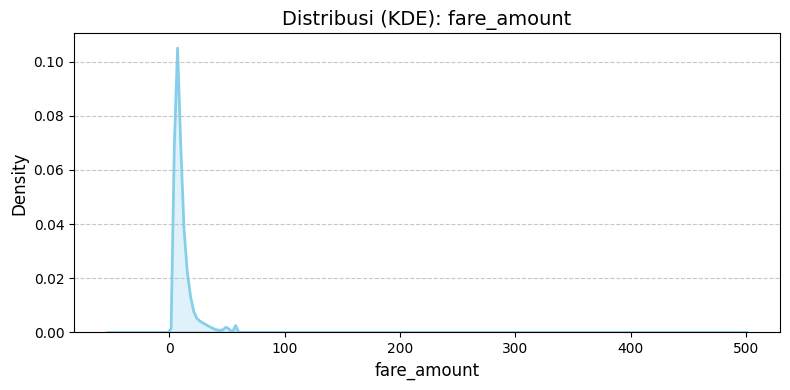

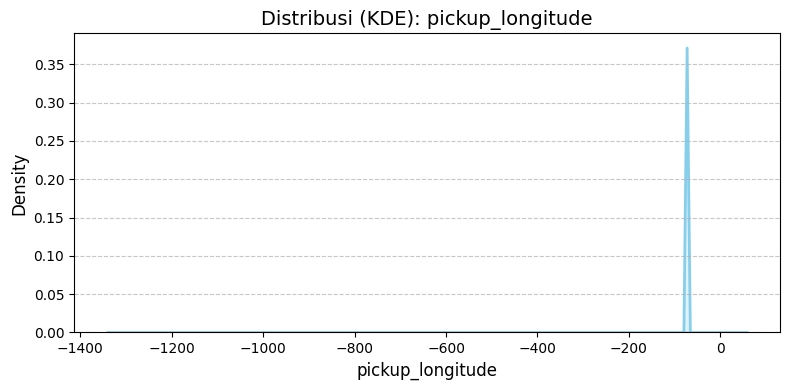

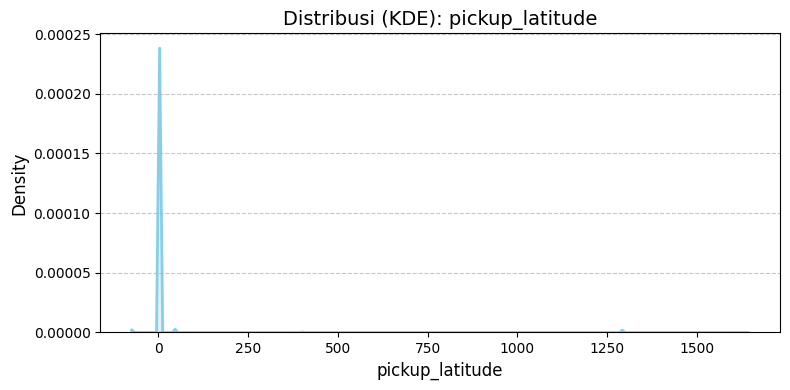

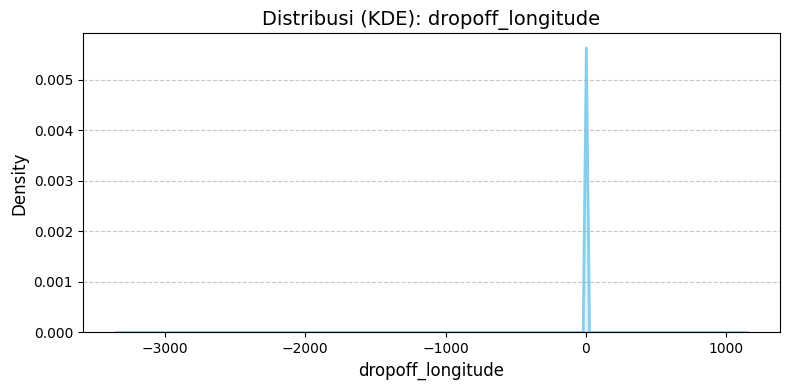

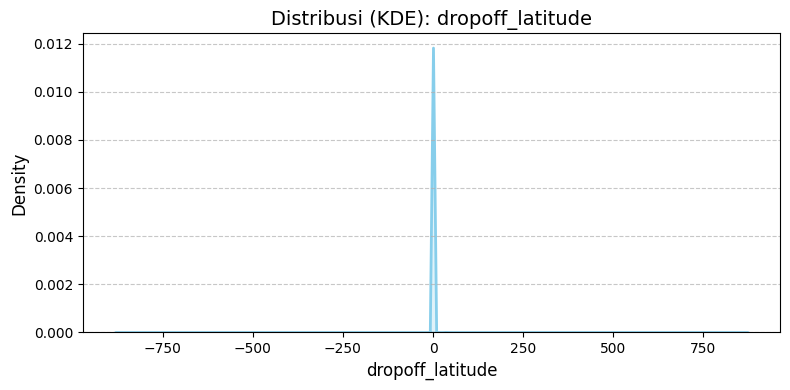

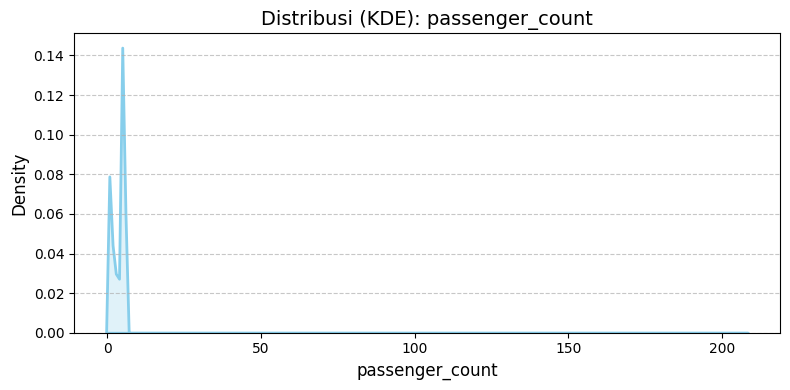

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot KDE (density) per kolom numerik
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col].dropna(), fill=True, color='skyblue', linewidth=2)
    plt.title(f'Distribusi (KDE): {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

# Data Preparation & Eda Akhir

###Membagi berdasarkan tahun, bulan, hari, dan jam

In [ ]:
#Membuat kolom tahun,bulan,hari dan jam dari pickup_datetime
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14


###Musim berdasarkan bulan
model dapat mempelajari dampak unik dari setiap musim terhadap tarif, yang mungkin tidak dapat ditangkap hanya dengan fitur tanggal atau bulan saja secara linier.

In [ ]:
#Extract Fitur Bulan Dijadikan Musim
def get_season(mnth):
  if mnth in [12,1,2]:
    return 'winter'
  elif mnth in [3,4,5]:
    return 'spring'
  elif mnth in [6,7,8]:
    return 'summer'
  elif mnth in [9,10,11]:
    return 'fall'

df['pickup_season'] = df['pickup_month'].apply(get_season)
season_map = {'winter': 0, 'spring': 1, 'summer': 2, 'fall': 3}
df['season_code'] = df['pickup_season'].map(season_map)

In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1


###Kategori Jam
Kategori Waktu dalam Sehari: Kelompokkan jam ke dalam "jam sibuk" (rush hour), "di luar jam sibuk" (off-peak), "malam" untuk menangkap pola non-linear.

Tujuan dari pengelompokan jam ke dalam kategori waktu dalam sehari adalah untuk menangkap perbedaan perilaku pengguna dan kondisi lalu lintas yang signifikan pada segmen waktu tertentu.

In [ ]:
#Extract Fitur Waktu Dijadikan Rush Hour
def hour_category(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'rush_hour'
    elif 0 <= hour <= 5:
        return 'night'
    else:
        return 'off_peak'

In [ ]:
df['pickup_hour_category'] = df['pickup_hour'].apply(hour_category)

In [ ]:
df['fare_amount'].describe()

,fare_amount
count,200000.000000
mean,11.359955
std,9.901776
min,-52.000000
25%,6.000000
50%,8.500000
75%,12.500000
max,499.000000


In [ ]:
#Menghapus Fare Amount Negatif, tidak mungkin jika negatif
df = df.drop(df[df['fare_amount'] < 0].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199983 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           199983 non-null  float64            
 1   pickup_datetime       199983 non-null  datetime64[ns, UTC]
 2   pickup_longitude      199983 non-null  float64            
 3   pickup_latitude       199983 non-null  float64            
 4   dropoff_longitude     199982 non-null  float64            
 5   dropoff_latitude      199982 non-null  float64            
 6   passenger_count       199983 non-null  int64              
 7   pickup_year           199983 non-null  int32              
 8   pickup_month          199983 non-null  int32              
 9   pickup_weekday        199983 non-null  int32              
 10  pickup_hour           199983 non-null  int32              
 11  pickup_season         199983 non-null  object            

###Memvalidasi koordinat

In [ ]:
#Menyaring koordinat tidak valid:
#Baris dengan nilai latitude di luar -90 sampai 90 atau longitude di luar -180
#sampai 180 dihapus karena tidak sesuai dengan batas koordinat

#Filter lokasi: hanya wilayah NYC
df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['dropoff_longitude'].between(-180, 180)) &
    (df['pickup_latitude'] != 0) &
    (df['pickup_longitude'] != 0) &
    (df['dropoff_latitude'] != 0) &
    (df['dropoff_longitude'] != 0)
]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196003 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           196003 non-null  float64            
 1   pickup_datetime       196003 non-null  datetime64[ns, UTC]
 2   pickup_longitude      196003 non-null  float64            
 3   pickup_latitude       196003 non-null  float64            
 4   dropoff_longitude     196003 non-null  float64            
 5   dropoff_latitude      196003 non-null  float64            
 6   passenger_count       196003 non-null  int64              
 7   pickup_year           196003 non-null  int32              
 8   pickup_month          196003 non-null  int32              
 9   pickup_weekday        196003 non-null  int32              
 10  pickup_hour           196003 non-null  int32              
 11  pickup_season         196003 non-null  object            

In [ ]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [ ]:
#Tidak mungkin tidak membawa penumpang dan melebihi 6
df = df.drop(df[(df['passenger_count'] > 6) | (df['passenger_count'] < 1)].index)

In [ ]:
print(df['passenger_count'].value_counts())

passenger_count
1    135626
2     28863
5     13738
3      8705
6      4202
4      4182
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195316 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           195316 non-null  float64            
 1   pickup_datetime       195316 non-null  datetime64[ns, UTC]
 2   pickup_longitude      195316 non-null  float64            
 3   pickup_latitude       195316 non-null  float64            
 4   dropoff_longitude     195316 non-null  float64            
 5   dropoff_latitude      195316 non-null  float64            
 6   passenger_count       195316 non-null  int64              
 7   pickup_year           195316 non-null  int32              
 8   pickup_month          195316 non-null  int32              
 9   pickup_weekday        195316 non-null  int32              
 10  pickup_hour           195316 non-null  int32              
 11  pickup_season         195316 non-null  object            

###  Menghitung Jarak (Rumus Haversine)

Untuk menghitung jarak antara dua titik di permukaan bumi, digunakan **Rumus Haversine** yang memperhitungkan kelengkungan bumi, berdasarkan koordinat lintang (*latitude*) dan bujur (*longitude*).

$$
d = 2R \cdot \arcsin\left(
\sqrt{
\sin^2\left(\frac{\phi_2 - \phi_1}{2}\right) +
\cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)
}
\right)
$$

---

**Keterangan:**

- $ \phi_1, \phi_2 $ : lintang titik 1 dan titik 2 (dalam radian)  
- $ \lambda_1, \lambda_2 $ : bujur titik 1 dan titik 2 (dalam radian)  
- $ \Delta\phi = \phi_2 - \phi_1 $ : selisih lintang  
- $ \Delta\lambda = \lambda_2 - \lambda_1 $ : selisih bujur  
- $ R $ : jari-jari bumi (sekitar **6371 km**)  
- $ d $ : jarak antar dua titik (dalam kilometer)
- \( d \): jarak antar dua titik (dalam kilometer)

---

**Konversi ke radian** *(sebelum digunakan dalam rumus)*:

$$
\phi = \text{latitude} \times \left(\frac{\pi}{180}\right), \quad
\lambda = \text{longitude} \times \left(\frac{\pi}{180}\right)
$$


In [ ]:
# Mengimpor modul matematika untuk operasi trigonometri dan konversi derajat ke radian
import math

# Mendefinisikan fungsi haversine untuk menghitung jarak antara dua titik di permukaan bumi
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Jari-jari bumi dalam kilometer

    # Mengubah semua koordinat dari derajat ke radian agar bisa digunakan dalam fungsi trigonometri
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Menghitung selisih lintang dan bujur
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Menerapkan Rumus Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))  # Menghitung jarak dalam bentuk sudut (radian)

    return R * c  # Mengalikan dengan jari-jari bumi untuk mendapatkan jarak dalam kilometer

# Menerapkan fungsi haversine ke setiap baris DataFrame untuk menghitung kolom baru 'distance'
df['dist'] = df.apply(
    lambda row: haversine(
        row['pickup_latitude'], row['pickup_longitude'],     # Titik awal (penjemputan)
        row['dropoff_latitude'], row['dropoff_longitude']    # Titik akhir (tujuan)
    ),
    axis=1  # axis=1 artinya fungsi diterapkan ke setiap baris (bukan kolom)
)

In [ ]:
df_nyc_pickup = df[
    (df['pickup_longitude'] >= -74.05) & (df['pickup_longitude'] <= -73.75) &
    (df['pickup_latitude']  >= 40.5)   & (df['pickup_latitude']  <= 40.92)
]

(0.0, 100.0)

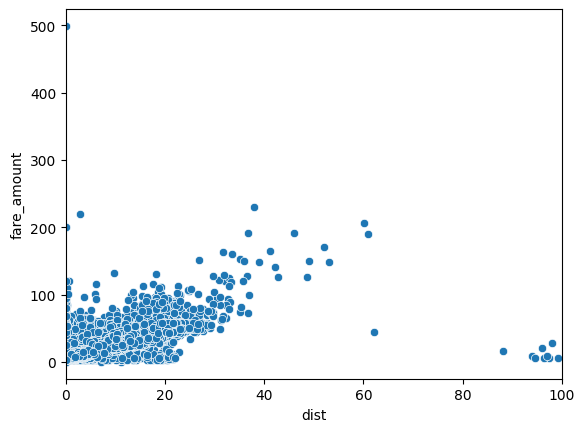

In [ ]:
sns.scatterplot(x=df_nyc_pickup['dist'], y=df_nyc_pickup['fare_amount'])
plt.xlim([0, 100])

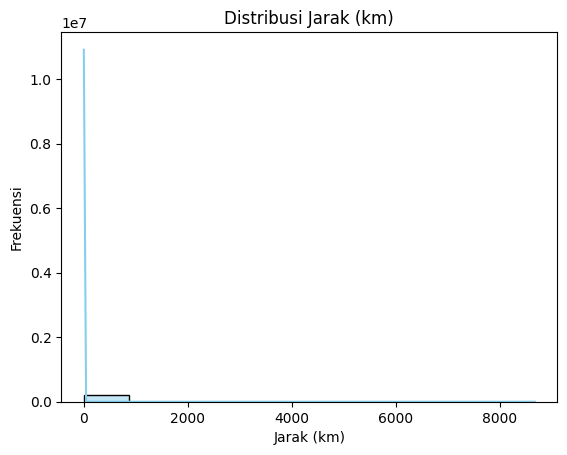

In [ ]:
sns.histplot(df_nyc_pickup['dist'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Jarak (km)')
plt.xlabel('Jarak (km)')
plt.ylabel('Frekuensi')
plt.show()

Terlalu Banyak Outlier

In [ ]:
(df_nyc_pickup['dist'] > 100).sum()

np.int64(37)

In [ ]:
df_nyc_pickup[df_nyc_pickup['dist'] > 100]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
17926,5.3,2012-02-18 11:43:00+00:00,-73.962162,40.763307,-4.933332,40.774010,1,2012,2,5,11,winter,0,off_peak,5651.396519
19692,10.5,2011-02-14 16:29:32+00:00,-73.980805,40.747867,-73.957898,39.608972,1,2011,2,0,16,winter,0,rush_hour,126.654338
19846,10.5,2011-09-11 11:58:00+00:00,-74.005492,40.738877,-73.967477,0.760607,3,2011,9,6,11,fall,3,off_peak,4445.382454
22079,17.7,2011-02-05 02:20:22+00:00,-74.004872,40.729857,-73.948185,39.604057,2,2011,2,5,2,winter,0,night,125.275929
37122,17.3,2011-05-28 07:49:41+00:00,-73.967302,40.759383,-75.458979,39.653763,1,2011,5,5,7,spring,1,rush_hour,176.519082
37741,8.9,2011-03-13 18:12:20+00:00,-73.968131,40.765590,-73.972395,39.618371,2,2011,3,6,18,spring,1,rush_hour,127.565412
52972,10.5,2012-08-07 11:31:00+00:00,-73.987150,40.687925,-0.050000,40.712542,6,2012,8,1,11,summer,2,off_peak,6032.176201
53199,19.3,2011-04-15 13:08:53+00:00,-74.006697,40.705730,-73.949133,39.609582,1,2011,4,4,13,spring,1,off_peak,121.984292
60414,7.7,2012-01-14 01:33:00+00:00,-73.982242,40.771450,-7.980425,40.745385,1,2012,1,5,1,winter,0,night,5418.658814
70889,4.5,2009-06-02 16:31:00+00:00,-73.999647,40.768180,0.000213,-0.000013,1,2009,6,1,16,summer,2,rush_hour,8667.693178


In [ ]:
df_nyc_pickup[(df_nyc_pickup['dist'] > 60) & (df_nyc_pickup['dist'] < 100)]
df60_100 = df_nyc_pickup[(df_nyc_pickup['dist'] > 60) & (df_nyc_pickup['dist'] < 100)]

In [ ]:
df60_100

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
18415,190.00,2012-07-29 08:28:11+00:00,-73.797236,40.665420,-73.101445,40.812208,1,2012,7,6,8,summer,2,rush_hour,60.851156
23682,206.38,2014-11-02 22:40:20+00:00,-73.782161,40.644601,-74.449079,40.836457,1,2014,11,6,22,fall,3,off_peak,60.100889
33199,20.10,2010-06-09 21:05:49+00:00,-73.960267,40.765465,-73.137393,41.366138,1,2010,6,2,21,summer,2,off_peak,96.021362
67231,6.10,2010-06-14 09:07:16+00:00,-73.975333,40.759635,-73.137393,41.366138,1,2010,6,0,9,summer,2,rush_hour,97.382812
89971,8.10,2009-09-28 17:36:06+00:00,-73.948564,40.782308,-73.137393,41.366138,1,2009,9,0,17,fall,3,rush_hour,94.009832
97989,5.30,2009-04-19 22:40:53+00:00,-73.984003,40.743455,-73.137393,41.366138,4,2009,4,6,22,spring,1,off_peak,99.162509
101692,27.70,2009-05-19 16:53:43+00:00,-73.985779,40.758935,-73.137393,41.366138,1,2009,5,1,16,spring,1,rush_hour,98.070305
108759,5.30,2009-01-11 14:38:04+00:00,-73.967587,40.765662,-73.137393,41.366138,1,2009,1,6,14,winter,0,off_peak,96.447944
113678,5.30,2010-07-05 10:15:02+00:00,-73.946219,40.772729,-73.137393,41.366138,1,2010,7,0,10,summer,2,off_peak,94.611052
116191,8.90,2009-11-20 19:51:14+00:00,-73.964483,40.756388,-73.137393,41.366138,1,2009,11,4,19,fall,3,rush_hour,96.981946


In [ ]:
import folium

# Ambil titik awal sebagai pusat peta (tengah NYC)
nyc_center = [40.7128, -74.0060]  # NYC lat-lon

# Inisialisasi peta
m = folium.Map(location=nyc_center, zoom_start=9)

# Ambil 100 sampel untuk efisiensi visualisasi
sampled_df = df60_100.sample(n=10, random_state=1)

# Tambahkan garis perjalanan dan titik pickup/dropoff
for _, row in sampled_df.iterrows():
    pickup = [row['pickup_latitude'], row['pickup_longitude']]
    dropoff = [row['dropoff_latitude'], row['dropoff_longitude']]

    # Garis rute
    folium.PolyLine(locations=[pickup, dropoff], color='blue', weight=2, opacity=0.5).add_to(m)

    # Titik pickup
    folium.CircleMarker(location=pickup, radius=4, color='green', fill=True, fill_opacity=0.7).add_to(m)

    # Titik dropoff
    folium.CircleMarker(location=dropoff, radius=4, color='red', fill=True, fill_opacity=0.7).add_to(m)

# Tampilkan peta
m

Terlihat tidak meyakinkan > 60km, kita cek 40km

In [ ]:
df_35_61 = df_nyc_pickup[(df_nyc_pickup['dist'] > 35) & (df_nyc_pickup['dist'] < 61)]
df_35_61

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
9060,126.10,2011-06-13 15:46:00+00:00,-73.788657,40.640643,-74.001350,41.048048,1,2011,6,0,15,summer,2,off_peak,48.706330
18415,190.00,2012-07-29 08:28:11+00:00,-73.797236,40.665420,-73.101445,40.812208,1,2012,7,6,8,summer,2,rush_hour,60.851156
23148,126.83,2014-06-11 16:15:00+00:00,-73.781277,40.644915,-73.760570,41.029780,1,2014,6,2,16,summer,2,rush_hour,42.830475
23682,206.38,2014-11-02 22:40:20+00:00,-73.782161,40.644601,-74.449079,40.836457,1,2014,11,6,22,fall,3,off_peak,60.100889
33609,100.00,2013-12-20 01:34:00+00:00,-74.005518,40.738890,-74.438630,40.683112,1,2013,12,4,1,winter,0,night,37.028695
36333,148.33,2013-06-19 18:27:00+00:00,-73.806845,40.685285,-73.853342,41.161225,1,2013,6,2,18,summer,2,rush_hour,53.066101
39716,191.80,2012-06-26 22:28:00+00:00,-73.822978,40.788500,-73.548110,41.045037,1,2012,6,1,22,summer,2,off_peak,36.703299
45094,170.00,2014-11-10 16:55:00+00:00,-73.789297,40.643437,-74.402822,40.698832,1,2014,11,0,16,fall,3,rush_hour,52.108219
72782,147.80,2012-03-16 18:20:00+00:00,-73.876337,40.772152,-73.567932,41.033868,1,2012,3,4,18,spring,1,rush_hour,38.970571
87154,140.25,2013-06-23 18:59:45+00:00,-73.960012,40.773023,-74.031707,41.149037,1,2013,6,6,18,summer,2,rush_hour,42.242033


In [ ]:
import folium

# Ambil titik awal sebagai pusat peta (tengah NYC)
nyc_center = [40.7128, -74.0060]  # NYC lat-lon

# Inisialisasi peta
m = folium.Map(location=nyc_center, zoom_start=9)

# Ambil 100 sampel untuk efisiensi visualisasi
sampled_df = df_35_61

# Tambahkan garis perjalanan dan titik pickup/dropoff
for _, row in sampled_df.iterrows():
    pickup = [row['pickup_latitude'], row['pickup_longitude']]
    dropoff = [row['dropoff_latitude'], row['dropoff_longitude']]

    # Garis rute
    folium.PolyLine(locations=[pickup, dropoff], color='blue', weight=2, opacity=0.5).add_to(m)

    # Titik pickup
    folium.CircleMarker(location=pickup, radius=4, color='green', fill=True, fill_opacity=0.7).add_to(m)

    # Titik dropoff
    folium.CircleMarker(location=dropoff, radius=4, color='red', fill=True, fill_opacity=0.7).add_to(m)

# Tampilkan peta
m


In [ ]:
#Kita drop diatas 61km
df_clear = df_nyc_pickup[df_nyc_pickup['dist'] < 61]

(0.0, 60.0)

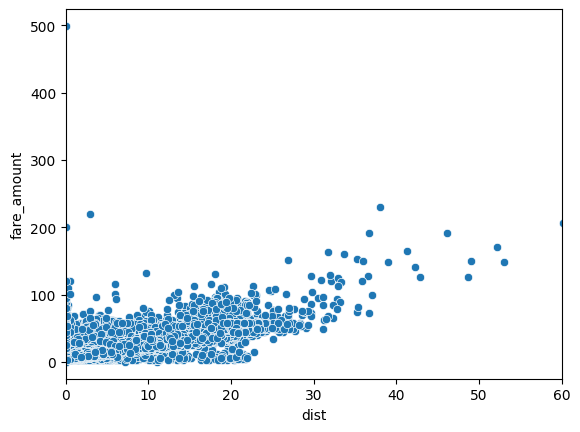

In [ ]:
sns.scatterplot(x=df_clear['dist'], y=df_clear['fare_amount'])
plt.xlim([0, 60])

In [ ]:
indices = df_clear[df_clear['dist'] == 0].index
df_clear.drop(indices, axis=0, inplace=True)
df_clear.reset_index(drop=True, inplace=True)
df_clear

/tmp/ipython-input-42-1084454413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2,off_peak,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2,rush_hour,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2,rush_hour,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192851,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3,off_peak,0.112210
192852,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1,night,1.875050
192853,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2,night,12.850319
192854,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1,off_peak,3.539715


In [ ]:
indices = df_clear[(df_clear['fare_amount'] < 1) & (df_clear['dist'] > 1)].index
df_clear.drop(indices, axis=0, inplace=True)
df_clear.reset_index(drop=True, inplace=True)
df_clear

/tmp/ipython-input-43-150737574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2,off_peak,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2,rush_hour,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2,rush_hour,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192849,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3,off_peak,0.112210
192850,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1,night,1.875050
192851,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2,night,12.850319
192852,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1,off_peak,3.539715


In [ ]:
indices = df_clear[(df_clear['fare_amount'] > 100) & (df_clear['dist'] < 1)].index
df_clear.drop(indices, axis=0, inplace=True)
df_clear.reset_index(drop=True, inplace=True)
df_clear

/tmp/ipython-input-44-2984548562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,summer,2,off_peak,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,summer,2,rush_hour,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,summer,2,rush_hour,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192842,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,fall,3,off_peak,0.112210
192843,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,spring,1,night,1.875050
192844,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,summer,2,night,12.850319
192845,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,spring,1,off_peak,3.539715


(0.0, 62.0)

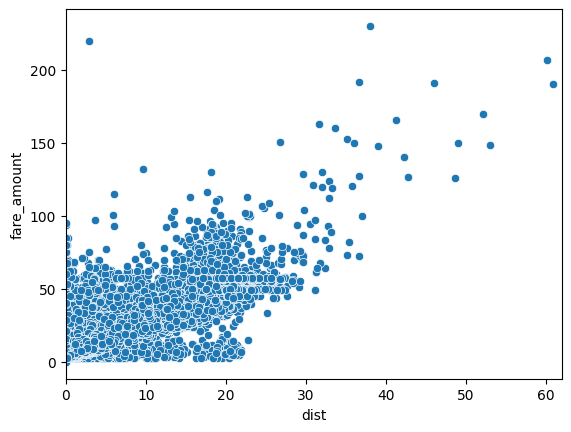

In [ ]:
sns.scatterplot(x=df_clear['dist'], y=df_clear['fare_amount'])
plt.xlim([0, 62])

In [ ]:
# Hitung fare per km
df_clear['fare_per_km'] = df_clear['fare_amount'] / df_clear['dist']

# Buang nilai tidak valid (misalnya dist = 0)
df_clear = df_clear[df_clear['fare_per_km'].notna() & df_clear['fare_per_km'] != np.inf]

# Menggunakan IQR untuk deteksi outlier pada fare_per_km
Q1 = df_clear['fare_per_km'].quantile(0.25)
Q3 = df_clear['fare_per_km'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data yang masuk akal
df_clear = df_clear[(df_clear['fare_per_km'] >= lower_bound) & (df_clear['fare_per_km'] <= upper_bound)]

# Hapus kolom bantu jika tidak diperlukan
df_clear.drop(columns='fare_per_km', inplace=True)

# (Opsional) Tampilkan hasil
print(f"Jumlah data setelah filter: {len(df_clear)}")


Jumlah data setelah filter: 181895


/tmp/ipython-input-46-3706786517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['fare_per_km'] = df_clear['fare_amount'] / df_clear['dist']


# EDA

In [ ]:
num_cols = df_clear.select_dtypes(include='number').columns
num_cols = num_cols.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
num_cols

Index(['fare_amount', 'passenger_count', 'pickup_year', 'pickup_month',
       'pickup_weekday', 'pickup_hour', 'season_code', 'dist'],
      dtype='object')

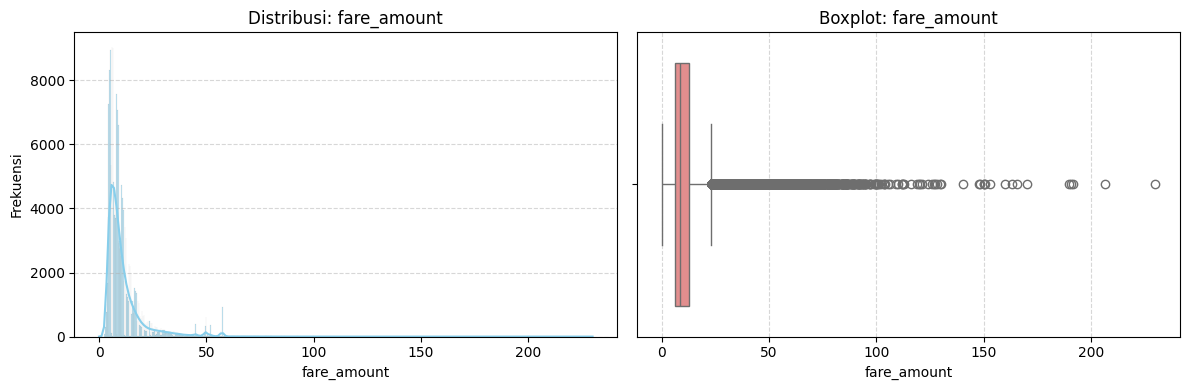

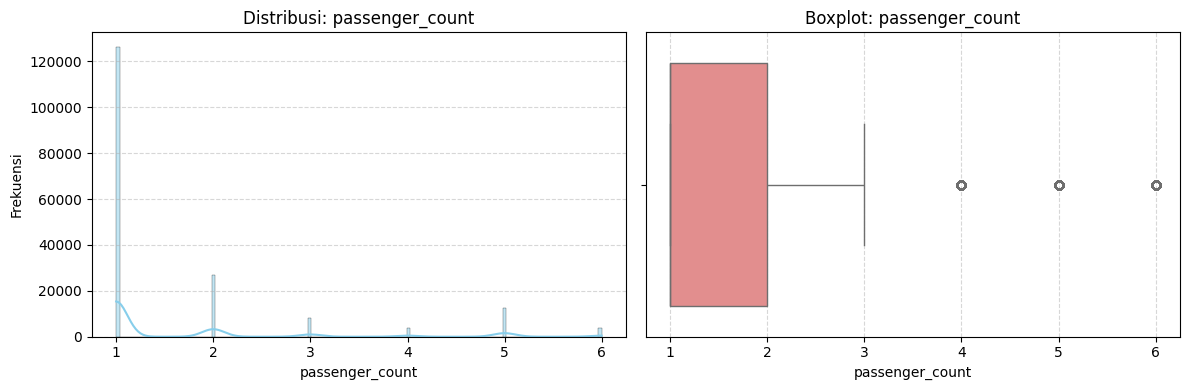

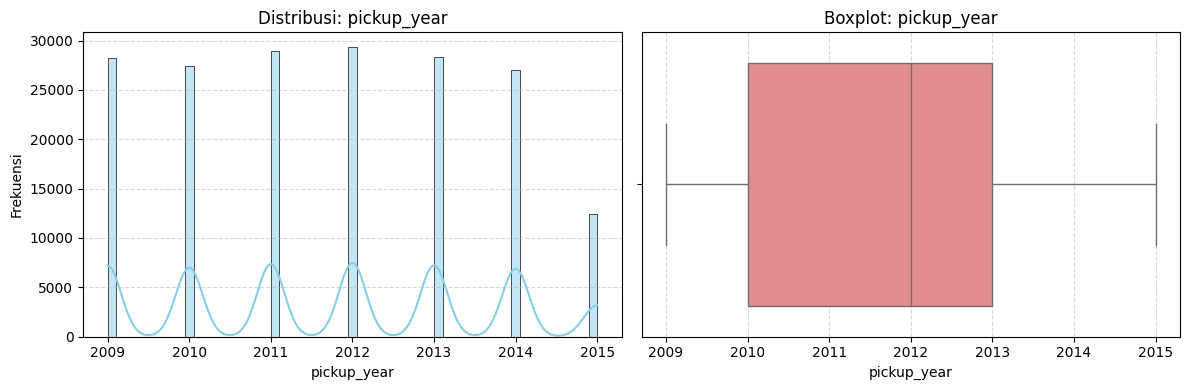

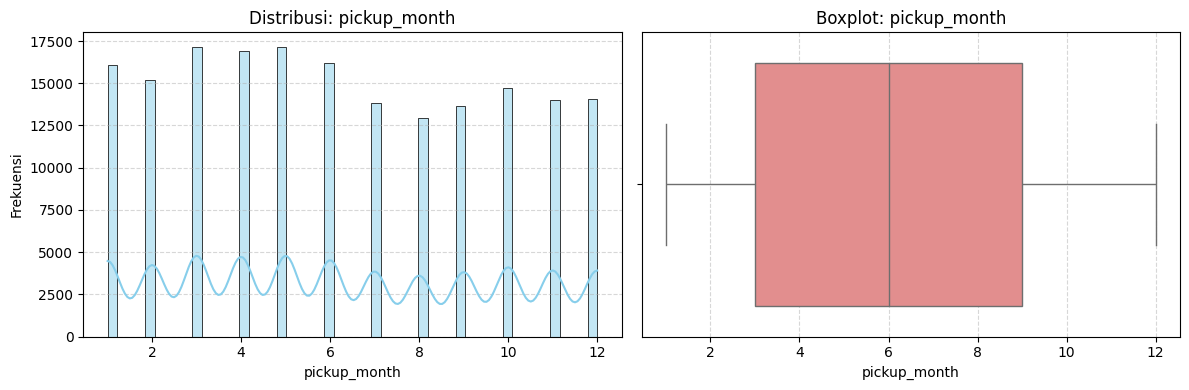

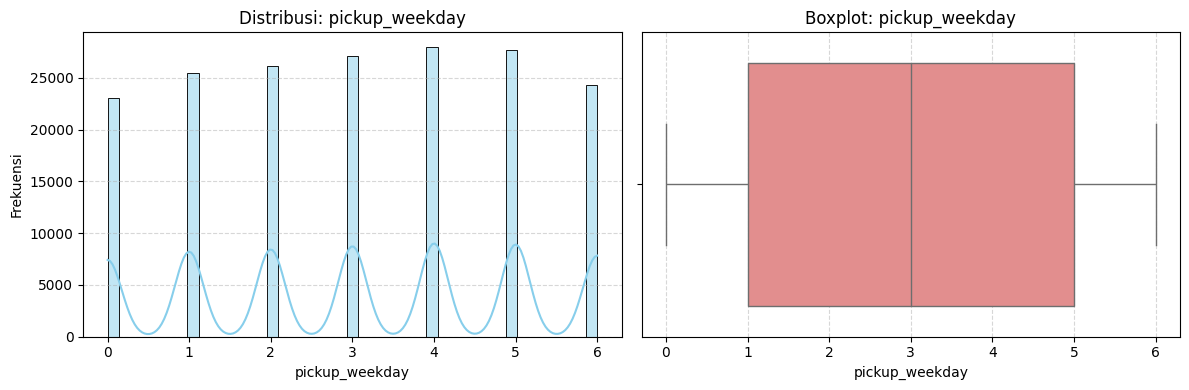

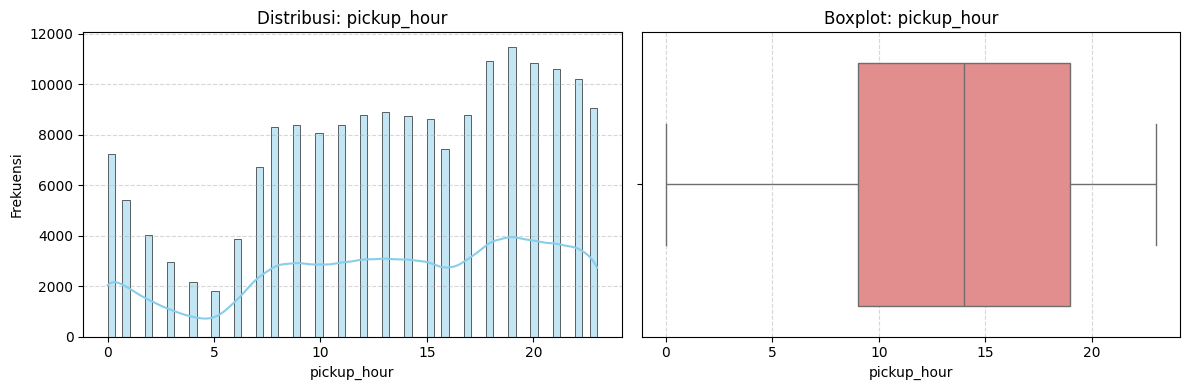

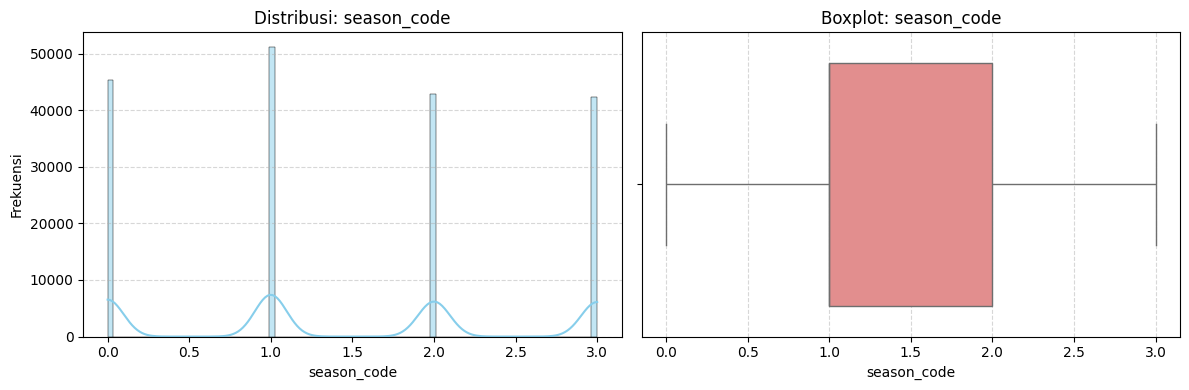

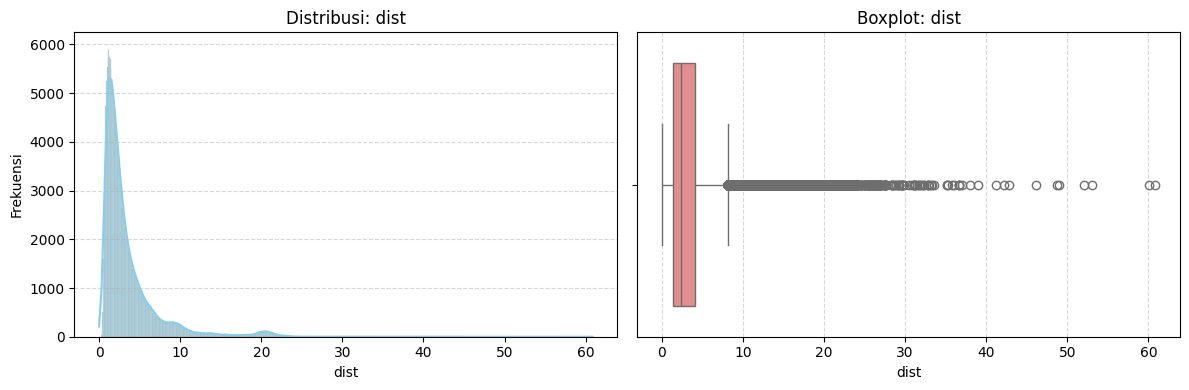

In [ ]:
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Histplot (distribusi)
    sns.histplot(df_clear[col], kde=True, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f'Distribusi: {col}', fontsize=12)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frekuensi')
    axes[0].grid(True, axis='y', linestyle='--', alpha=0.5)

    # Boxplot (outlier)
    sns.boxplot(x=df_clear[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot: {col}', fontsize=12)
    axes[1].set_xlabel(col)
    axes[1].grid(True, axis='x', linestyle='--', alpha=0.5)

    # Optimalkan layout
    plt.tight_layout()
    plt.show()


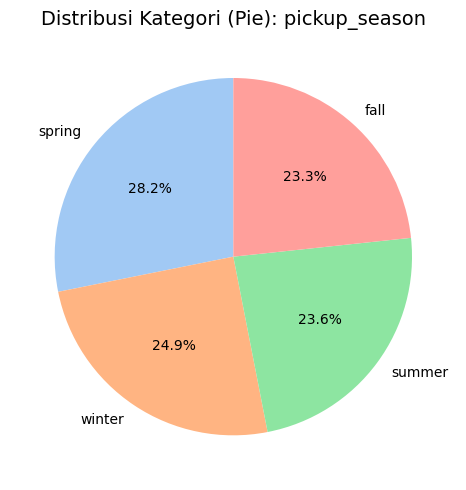

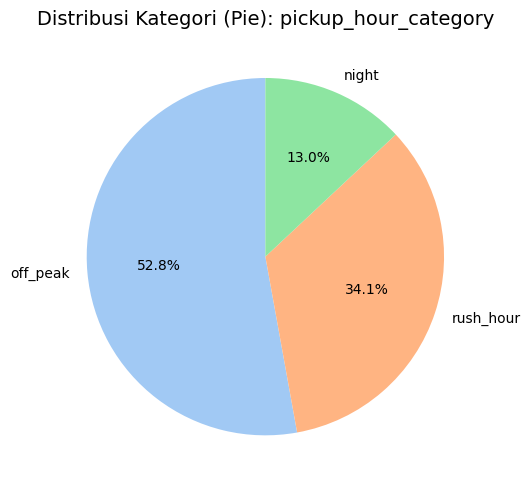

In [ ]:
cat_cols = df.select_dtypes(include='O').columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    unique_vals = df_clear[col].nunique()

    if unique_vals < 7:
        # Pie chart (kategori sedikit)
        dff = df_clear[col].value_counts().reset_index()
        dff.columns = [col, 'count']
        plt.pie(
            dff['count'],
            labels=dff[col],
            autopct="%1.1f%%",
            startangle=90,
            colors=sns.color_palette("pastel")
        )
        plt.title(f"Distribusi Kategori (Pie): {col}", fontsize=14)

    elif unique_vals < 50:
        # Countplot standar
        sns.countplot(x=col, data=df_clear, palette="Set2")
        plt.title(f"Distribusi Kategori (Countplot): {col}", fontsize=14)
        plt.xticks(rotation=45)

    else:
        # Top 10 kategori terbanyak
        top10 = df_clear[col].value_counts().nlargest(10).index
        dff = df_clear[df_clear[col].isin(top10)]
        sns.countplot(x=col, data=dff, order=top10, palette="Set3")
        plt.title(f"Top 10 Kategori Terbanyak: {col}", fontsize=14)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

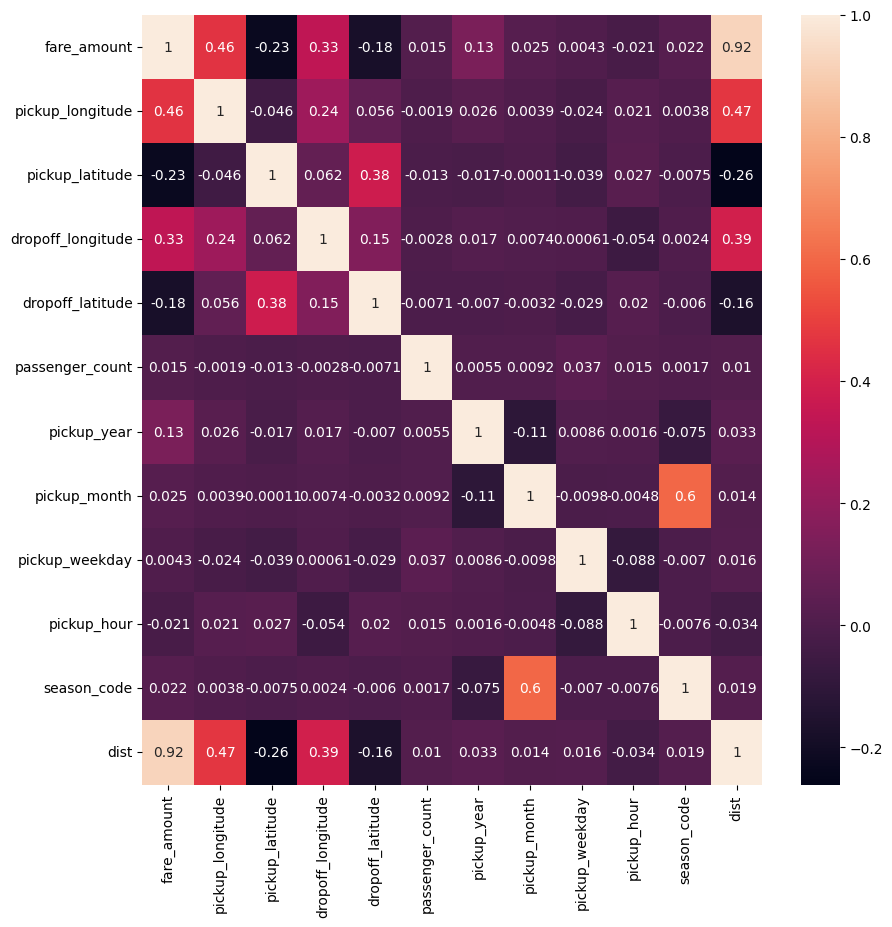

In [ ]:
# bi-variate analysis
plt.figure(figsize=(10, 10))
sns.heatmap(df_clear.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [ ]:
dff = df_clear.groupby("pickup_year")[['fare_amount']].mean().reset_index().sort_values(by='pickup_year')
dff
px.line(x=dff['pickup_year'], y=dff['fare_amount'])

/tmp/ipython-input-52-3958866812.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/tmp/ipython-input-52-3958866812.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




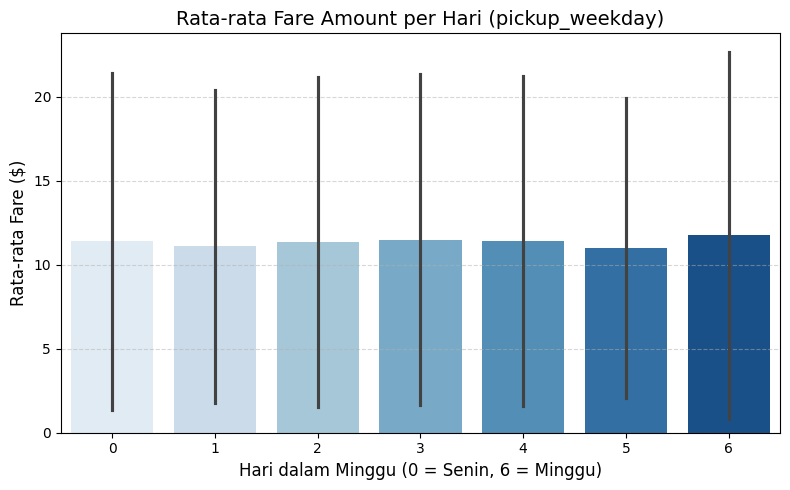

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='pickup_weekday',
    y='fare_amount',
    data=df,
    estimator=np.mean,
    palette='Blues',
    ci='sd'  # tampilkan deviasi standar sebagai error bar
)

plt.title('Rata-rata Fare Amount per Hari (pickup_weekday)', fontsize=14)
plt.xlabel('Hari dalam Minggu (0 = Senin, 6 = Minggu)', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-53-701960481.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/tmp/ipython-input-53-701960481.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




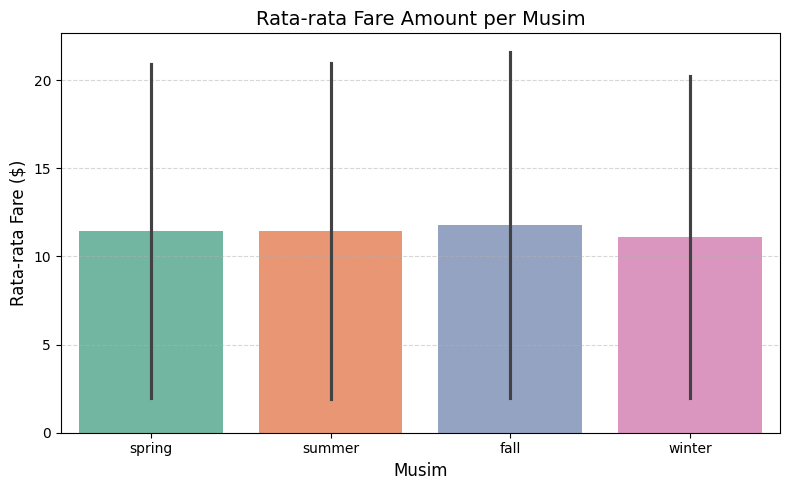

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clear,
    x='pickup_season',
    y='fare_amount',
    estimator=np.mean,
    ci='sd',  # tambahkan error bar berupa standar deviasi
    palette='Set2'
)

plt.title('Rata-rata Fare Amount per Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-54-1325100114.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/tmp/ipython-input-54-1325100114.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




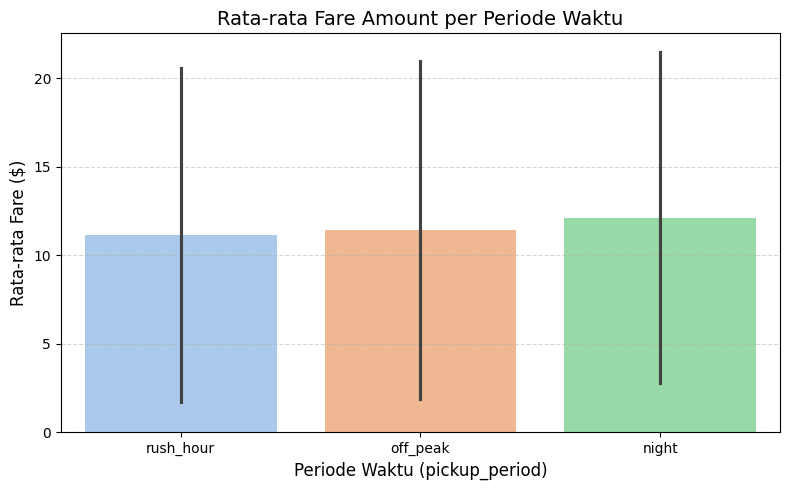

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clear,
    x='pickup_hour_category',
    y='fare_amount',
    estimator=np.mean,
    ci='sd',  # tambahkan error bar
    palette='pastel'
)

plt.title('Rata-rata Fare Amount per Periode Waktu', fontsize=14)
plt.xlabel('Periode Waktu (pickup_period)', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-55-2074021576.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/tmp/ipython-input-55-2074021576.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




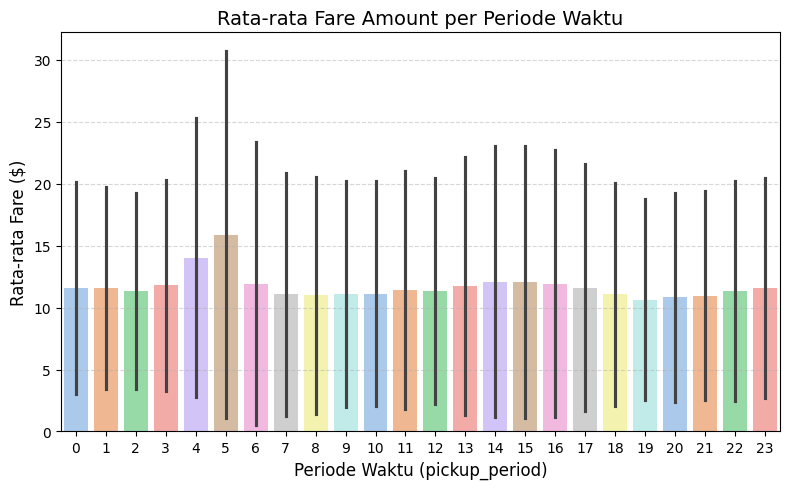

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clear,
    x='pickup_hour',
    y='fare_amount',
    estimator=np.mean,
    ci='sd',  # tambahkan error bar
    palette='pastel'
)

plt.title('Rata-rata Fare Amount per Periode Waktu', fontsize=14)
plt.xlabel('Periode Waktu (pickup_period)', fontsize=12)
plt.ylabel('Rata-rata Fare ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


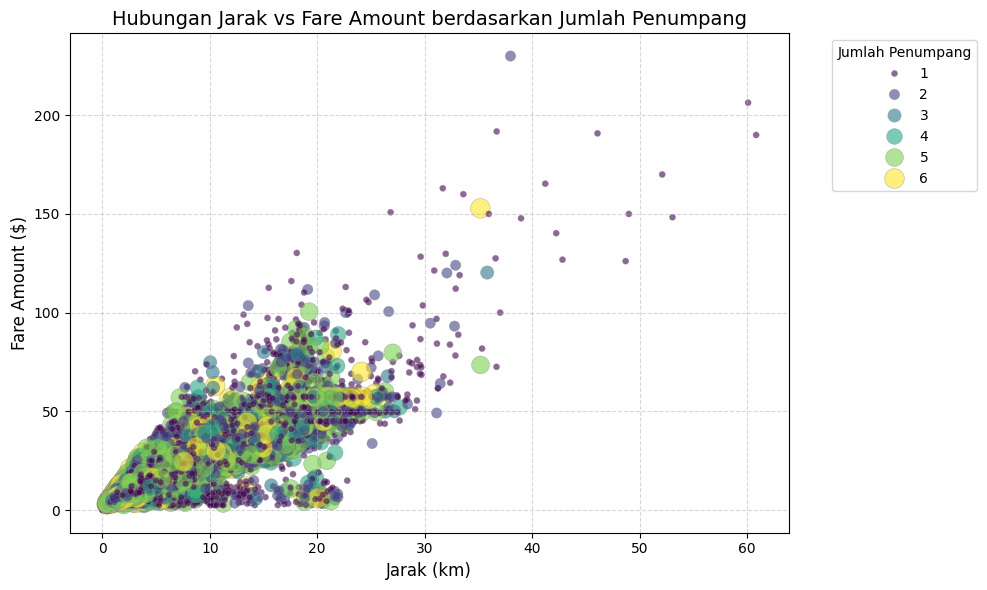

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clear,
    x='dist',
    y='fare_amount',
    size='passenger_count',
    hue='passenger_count',
    sizes=(20, 200),
    palette='viridis',
    alpha=0.6,
    edgecolor='gray'
)

plt.title('Hubungan Jarak vs Fare Amount berdasarkan Jumlah Penumpang', fontsize=14)
plt.xlabel('Jarak (km)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Jumlah Penumpang', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Data Preprocessing

In [ ]:
dfp = df_clear.copy()

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181895 entries, 0 to 192846
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           181895 non-null  float64            
 1   pickup_datetime       181895 non-null  datetime64[ns, UTC]
 2   pickup_longitude      181895 non-null  float64            
 3   pickup_latitude       181895 non-null  float64            
 4   dropoff_longitude     181895 non-null  float64            
 5   dropoff_latitude      181895 non-null  float64            
 6   passenger_count       181895 non-null  int64              
 7   pickup_year           181895 non-null  int32              
 8   pickup_month          181895 non-null  int32              
 9   pickup_weekday        181895 non-null  int32              
 10  pickup_hour           181895 non-null  int32              
 11  pickup_season         181895 non-null  object            

In [ ]:
#Menghapus empat kolom koordinat geografis dari DataFrame
dfp.drop(columns = {"pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"},inplace=True)

In [ ]:
dfp

,fare_amount,pickup_datetime,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,1,2009,7,4,20,summer,2,off_peak,2.457590
2,12.9,2009-08-24 21:45:00+00:00,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,3,2009,6,4,8,summer,2,rush_hour,1.661683
4,16.0,2014-08-28 17:47:00+00:00,5,2014,8,3,17,summer,2,rush_hour,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
192840,9.5,2012-09-29 19:51:27+00:00,1,2012,9,5,19,fall,3,rush_hour,2.640893
192843,7.5,2014-03-14 01:09:00+00:00,1,2014,3,4,1,spring,1,night,1.875050
192844,30.9,2009-06-29 00:42:00+00:00,2,2009,6,0,0,summer,2,night,12.850319
192845,14.5,2015-05-20 14:56:25+00:00,1,2015,5,2,14,spring,1,off_peak,3.539715


### Menghitung dan Menangani Outlier per Kolom dengan Metode IQR dan filter

Untuk mendeteksi outlier pada setiap kolom numerik, kita dapat menggunakan metode IQR (*Interquartile Range*).

Outlier didefinisikan sebagai data yang:

- Lebih kecil dari:  
  $$ \text{Lower Bound} = Q1 - 1.5 \times IQR $$

- Atau lebih besar dari:  
  $$ \text{Upper Bound} = Q3 + 1.5 \times IQR $$

Dengan keterangan:

- $Q1$: kuartil pertama (25%)  
- $Q3$: kuartil ketiga (75%)  
- $IQR = Q3 - Q1$: rentang antar kuartil


In [ ]:
dfp.to_csv('dfp_fix.csv', index=False)

In [ ]:
# Fungsi untuk menghitung outlier per kolom numerik
def hitung_outlier(df):
    hasil = []
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        jumlah_outlier = len(outliers)
        persentase = 100 * jumlah_outlier / len(df)

        hasil.append({
            'Kolom': col,
            'Jumlah Outlier': jumlah_outlier,
            'Persentase Outlier (%)': round(persentase, 2)
        })

    return pd.DataFrame(hasil)

# === Sebelum Penghapusan ===
print("Outlier Sebelum Penghapusan:")
df_outlier_sebelum = hitung_outlier(dfp)
print(df_outlier_sebelum)

Outlier Sebelum Penghapusan:
             Kolom  Jumlah Outlier  Persentase Outlier (%)
0      fare_amount           14771                    8.12
1  passenger_count           20461                   11.25
2      pickup_year               0                    0.00
3     pickup_month               0                    0.00
4   pickup_weekday               0                    0.00
5      pickup_hour               0                    0.00
6      season_code               0                    0.00
7             dist           15189                    8.35


In [ ]:
# Menghapus outlier gabungan semua kolom numerik
mask = pd.Series(True, index=dfp.index)

for col in dfp.select_dtypes(include='number').columns:
    Q1 = dfp[col].quantile(0.25)
    Q3 = dfp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask &= (dfp[col] >= lower_bound) & (dfp[col] <= upper_bound)

df_clean = dfp[mask]  #  Data yang sudah dibersihkan

#  Hitung ulang outlier dari data yang sudah dibersihkan
print("\n Outlier Setelah Penghapusan:")
df_outlier_sesudah = hitung_outlier(df_clean)
print(df_outlier_sesudah)



 Outlier Setelah Penghapusan:
             Kolom  Jumlah Outlier  Persentase Outlier (%)
0      fare_amount            4354                    2.98
1  passenger_count           31495                   21.58
2      pickup_year               0                    0.00
3     pickup_month               0                    0.00
4   pickup_weekday               0                    0.00
5      pickup_hour               0                    0.00
6      season_code               0                    0.00
7             dist            5169                    3.54


**Dari hasil diatas:**
- Outlier fare_amount dan dist sudah turun drastis.

- Tapi passenger_count justru naik jadi 21.58%, dari sebelumnya 11.25%.

Ini adalah efek interaksi antar variabel dan perubahan distribusi data.

**Penjelasan teknis:**
- Outlier dihapus berdasarkan gabungan semua kolom.

- Itu menyebabkan banyak baris ekstrem dari fare_amount dan dist hilang.

- Distribusi passenger_count berubah drastis, karena baris-baris yang tadinya “mengimbangi” nilai-nilai ekstrem di passenger_count sudah terhapus.

- Maka, nilai IQR passenger_count menjadi lebih sempit, membuat makin banyak nilai yang kini dianggap outlier.

> Ini sering terjadi pada data tidak seimbang. Misalnya: 6 penumpang di data raw terdistribusi pada semua kondisi harga, tapi saat fare_amount ekstrem dihapus, sisa penumpang 6 hanya ada di kondisi tertentu -> outlier.



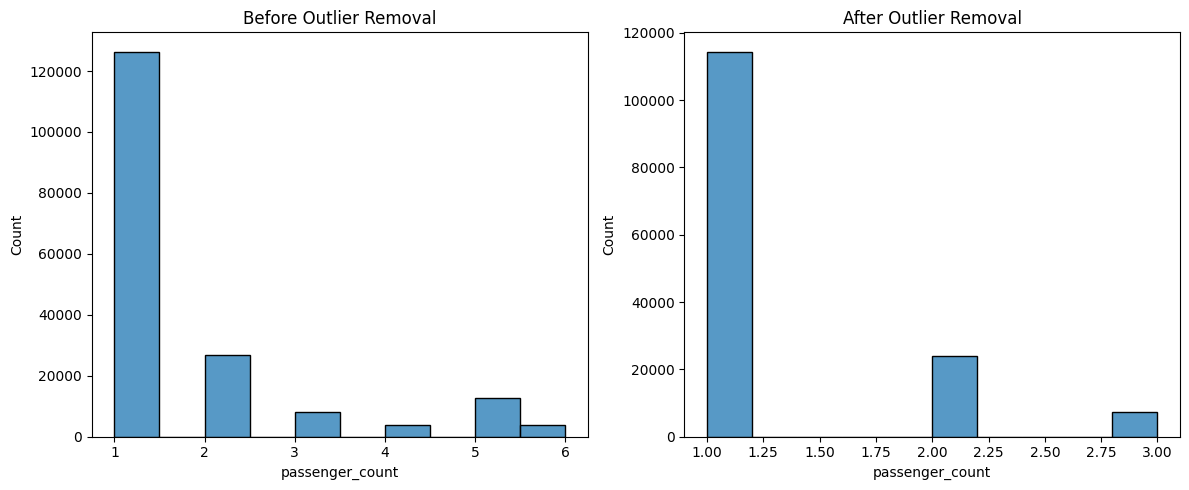

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(dfp['passenger_count'], bins=10, kde=False)
plt.title('Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['passenger_count'], bins=10, kde=False)
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()

**Sebelum Pembersihan:**
-	Data passenger_count menyebar dari 1 sampai 6.
-	Nilai terbanyak adalah 1, tapi nilai 2–6 masih ada dalam jumlah cukup banyak.
-	Nilai 4, 5, 6 awalnya tidak dikategorikan sebagai outlier karena sebaran datanya masih lengkap.

**Setelah Pembersihan:**
-	Yang tersisa hanya 1, 2, dan 3.
-	Nilai 4, 5, 6 sudah hilang dari data - kemungkinan besar karena baris-baris dengan passenger_count tinggi ikut tereliminasi saat bersihkan fare_amount dan dist.
-	Akibatnya, distribusi passenger_count jadi sempit -> IQR jadi lebih kecil -> angka 3 pun bisa masuk kategori outlier karena jauh dari Q1-Q3 baru.


**Solusi**

- Tidak menyaring passenger_count berdasarkan IQR, supaya distribusi tidak jadi sempit seperti yang terjadi hasil sebelumnya.

- Tapi tetap filter nilai passenger_count yang tidak masuk akal, misalnya 0 atau di atas 6.

- Fokus hanya menyaring outlier dari fare_amount dan dist, karena ini yang biasanya paling mempengaruhi prediksi harga.

In [ ]:
# === Buat mask hanya dari kolom numerik yang kontinu (kecuali passenger_count) ===
kolom_outlier = ['fare_amount', 'dist']  # bisa tambah kolom lain yang perlu dibersihkan

mask = pd.Series(True, index=dfp.index)

for col in kolom_outlier:
    Q1 = dfp[col].quantile(0.25)
    Q3 = dfp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask &= (dfp[col] >= lower_bound) & (dfp[col] <= upper_bound)

# === Terapkan mask ke dataframe awal ===
df_clean = dfp[mask]

# Buang hanya jika nilainya benar-benar aneh
df_clean = df_clean[df_clean['passenger_count'].between(1, 6)]

# Hitung ulang outlier dari data yang sudah dibersihkan
print("\n Outlier Setelah Penghapusan:")
df_outlier_sesudah = hitung_outlier(df_clean)
print(df_outlier_sesudah)


 Outlier Setelah Penghapusan:
             Kolom  Jumlah Outlier  Persentase Outlier (%)
0      fare_amount            4908                    2.99
1  passenger_count           18427                   11.21
2      pickup_year               0                    0.00
3     pickup_month               0                    0.00
4   pickup_weekday               0                    0.00
5      pickup_hour               0                    0.00
6      season_code               0                    0.00
7             dist            5740                    3.49


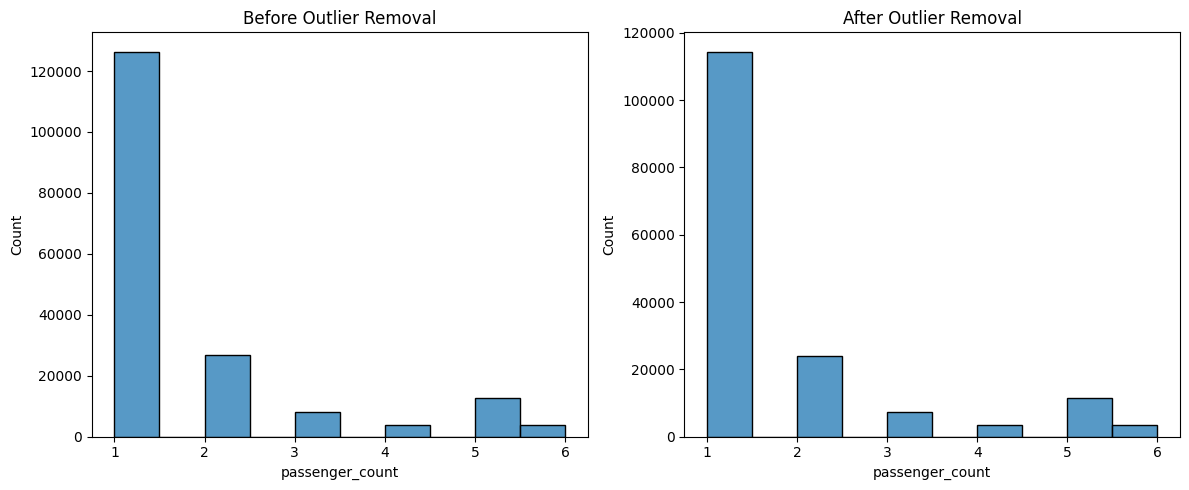

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(dfp['passenger_count'], bins=10, kde=False)
plt.title('Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['passenger_count'], bins=10, kde=False)
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181895 entries, 0 to 192846
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   fare_amount           181895 non-null  float64            
 1   pickup_datetime       181895 non-null  datetime64[ns, UTC]
 2   passenger_count       181895 non-null  int64              
 3   pickup_year           181895 non-null  int32              
 4   pickup_month          181895 non-null  int32              
 5   pickup_weekday        181895 non-null  int32              
 6   pickup_hour           181895 non-null  int32              
 7   pickup_season         181895 non-null  object             
 8   season_code           181895 non-null  int64              
 9   pickup_hour_category  181895 non-null  object             
 10  dist                  181895 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int32(4), int64(2)

In [ ]:
dfp['passenger_count'].value_counts()

,count
passenger_count,
1,126386
2,26930
5,12691
3,8118
4,3907
6,3863


##Split Features & Target

In [ ]:
#Split Features & Target
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

##Log Transform

In [ ]:
#Log-transform target
y_log = np.log1p(y)

#Hanya kolom 'dist' yang ditransformasi log
X_log = X.copy()
X_log['dist'] = np.log1p(X_log['dist'])

##Split train/test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [ ]:
dfp.head()

,fare_amount,pickup_datetime,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,season_code,pickup_hour_category,dist
0,7.5,2015-05-07 19:52:06+00:00,1,2015,5,3,19,spring,1,rush_hour,1.683323
1,7.7,2009-07-17 20:04:56+00:00,1,2009,7,4,20,summer,2,off_peak,2.457590
2,12.9,2009-08-24 21:45:00+00:00,1,2009,8,0,21,summer,2,off_peak,5.036377
3,5.3,2009-06-26 08:22:21+00:00,3,2009,6,4,8,summer,2,rush_hour,1.661683
4,16.0,2014-08-28 17:47:00+00:00,5,2014,8,3,17,summer,2,rush_hour,4.475450


##Pisahkan berdasarkan jenis

In [ ]:
# --- Numerik ---
numeric_features = ['passenger_count', 'dist', 'pickup_year']

# --- Siklikal ---
cyclical_features = {
    'pickup_month': 12,
    'pickup_weekday': 7,
    'pickup_hour': 24,
    'season_code': 4
}

# --- Nominal (one-hot) ---
nominal_features = ['pickup_hour_category']

##Cyclical Encoding

###Pickup Month

In [ ]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['pickup_month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['pickup_month'] / 12)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['pickup_month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['pickup_month'] / 12)

###Pickup Weekday

In [ ]:
X_train['weekday_sin'] = np.sin(2 * np.pi * X_train['pickup_weekday'] / 7)
X_train['weekday_cos'] = np.cos(2 * np.pi * X_train['pickup_weekday'] / 7)

X_test['weekday_sin'] = np.sin(2 * np.pi * X_test['pickup_weekday'] / 7)
X_test['weekday_cos'] = np.cos(2 * np.pi * X_test['pickup_weekday'] / 7)

###Pickup Hour

In [ ]:
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['pickup_hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['pickup_hour'] / 24)

X_test['hour_sin'] = np.sin(2 * np.pi * X_test['pickup_hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['pickup_hour'] / 24)

###Pickup Season Code

In [ ]:
X_train['season_sin'] = np.sin(2 * np.pi * X_train['season_code'] / 4)
X_train['season_cos'] = np.cos(2 * np.pi * X_train['season_code'] / 4)

X_test['season_sin'] = np.sin(2 * np.pi * X_test['season_code'] / 4)
X_test['season_cos'] = np.cos(2 * np.pi * X_test['season_code'] / 4)

##One-Hot Encoding
Kolom pickup_hour_category bertipe kategori nominal, yaitu tidak memiliki urutan logis antar nilainya (misalnya: rush_hour, off_peak).

Jika diberi label angka langsung (Label Encoding), model bisa salah mengasumsikan adanya hubungan matematis antar kategori, padahal hubungan itu tidak ada.

Oleh karena itu, digunakan One-Hot Encoding untuk mengubah setiap kategori menjadi kolom biner (0/1) agar:
* Tidak ada asumsi urutan
* Representasi kategori lebih akurat
* Model tidak terjebak interpretasi yang salah

In [ ]:
# Gunakan pd.get_dummies untuk one-hot encoding nominal
X_train = pd.get_dummies(X_train, columns=nominal_features, prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=nominal_features, prefix='hour_cat', drop_first=True)

# Align agar kolom di train dan test identik
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
X_train = X_train.drop(columns=['season_name'], errors='ignore')
X_test = X_test.drop(columns=['season_name'], errors='ignore')

##Scaling fitur numerik
Wajib untuk model seperti:
* Linear Regression
* Logistic Regression
* SVM
* KNN

Tidak perlu kalau pakai:
* Decision Tree
* Random Forest
* XGBoost

In [ ]:
# --- SETUP ---
from sklearn.preprocessing import StandardScaler

# Pisahkan kembali fitur numerik dan kategorikal jika perlu
numerical_cols = ['passenger_count', 'dist', 'pickup_year']
cyclical_cols = ['month_sin', 'month_cos', 'weekday_sin', 'weekday_cos',
                 'hour_sin', 'hour_cos', 'season_sin', 'season_cos']
onehot_cols = list(X_train.filter(like='pickup_hour_category_').columns)

# Gabung semua fitur yang akan di-scale
scaling_features = numerical_cols + cyclical_cols

# --- DROP kolom object (seperti 'season_name') ---
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

# --- PASTIKAN fitur yang akan di-scale ada di X_train dan X_test ---
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[scaling_features] = scaler.fit_transform(X_train[scaling_features])
X_test_scaled[scaling_features] = scaler.transform(X_test[scaling_features])

In [ ]:
X_train.head()

,pickup_datetime,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,season_code,dist,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos,season_sin,season_cos,hour_cat_off_peak,hour_cat_rush_hour
96291,2012-05-14 09:37:43+00:00,1,2012,5,0,9,1,1.431510,0.500000,-8.660254e-01,0.000000,1.000000,0.707107,-0.707107,1.000000e+00,6.123234e-17,False,True
127770,2013-09-02 20:41:53+00:00,1,2013,9,0,20,3,1.502218,-1.000000,-1.836970e-16,0.000000,1.000000,-0.866025,0.500000,-1.000000e+00,-1.836970e-16,True,False
166975,2014-10-24 09:04:00+00:00,1,2014,10,4,9,3,4.160515,-0.866025,5.000000e-01,-0.433884,-0.900969,0.707107,-0.707107,-1.000000e+00,-1.836970e-16,False,True
122955,2012-07-20 07:52:30+00:00,1,2012,7,4,7,2,19.699434,-0.500000,-8.660254e-01,-0.433884,-0.900969,0.965926,-0.258819,1.224647e-16,-1.000000e+00,False,True
3598,2010-03-31 19:47:44+00:00,1,2010,3,2,19,1,4.077989,1.000000,6.123234e-17,0.974928,-0.222521,-0.965926,0.258819,1.000000e+00,6.123234e-17,False,True


In [ ]:
X_train_scaled.head()

,pickup_datetime,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,season_code,dist,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos,season_sin,season_cos,hour_cat_off_peak,hour_cat_rush_hour
96291,2012-05-14 09:37:43+00:00,-0.52794,0.142266,5,0,9,1,-0.571977,0.629320,-1.205198,0.008128,1.485059,1.344594,-0.906783,1.328826,-0.020608,False,True
127770,2013-09-02 20:41:53+00:00,-0.52794,0.679729,9,0,20,3,-0.552524,-1.498011,0.020218,0.008128,1.485059,-1.003042,0.783797,-1.463192,-0.020608,True,False
166975,2014-10-24 09:04:00+00:00,-0.52794,1.217192,10,4,9,3,0.178811,-1.308006,0.727712,-0.602035,-1.223630,1.344594,-0.906783,-1.463192,-0.020608,False,True
122955,2012-07-20 07:52:30+00:00,-0.52794,0.142266,7,4,7,2,4.453790,-0.788901,-1.205198,-0.602035,-1.223630,1.730838,-0.278946,-0.067183,-1.457483,False,True
3598,2010-03-31 19:47:44+00:00,-0.52794,-0.932660,3,2,19,1,0.156108,1.338431,0.020218,1.379153,-0.256910,-1.152126,0.446017,1.328826,-0.020608,False,True


In [ ]:
print(X_train.dtypes)

pickup_datetime       datetime64[ns, UTC]
passenger_count                     int64
pickup_year                         int32
pickup_month                        int32
pickup_weekday                      int32
pickup_hour                         int32
season_code                         int64
dist                              float64
month_sin                         float64
month_cos                         float64
weekday_sin                       float64
weekday_cos                       float64
hour_sin                          float64
hour_cos                          float64
season_sin                        float64
season_cos                        float64
hour_cat_off_peak                    bool
hour_cat_rush_hour                   bool
dtype: object


In [ ]:
print(X_train_scaled.dtypes)

pickup_datetime       datetime64[ns, UTC]
passenger_count                   float64
pickup_year                       float64
pickup_month                        int32
pickup_weekday                      int32
pickup_hour                         int32
season_code                         int64
dist                              float64
month_sin                         float64
month_cos                         float64
weekday_sin                       float64
weekday_cos                       float64
hour_sin                          float64
hour_cos                          float64
season_sin                        float64
season_cos                        float64
hour_cat_off_peak                    bool
hour_cat_rush_hour                   bool
dtype: object


In [ ]:
print(X_train.isnull().sum())

pickup_datetime       0
passenger_count       0
pickup_year           0
pickup_month          0
pickup_weekday        0
pickup_hour           0
season_code           0
dist                  0
month_sin             0
month_cos             0
weekday_sin           0
weekday_cos           0
hour_sin              0
hour_cos              0
season_sin            0
season_cos            0
hour_cat_off_peak     0
hour_cat_rush_hour    0
dtype: int64


In [ ]:
print(X_train_scaled.isnull().sum())

pickup_datetime       0
passenger_count       0
pickup_year           0
pickup_month          0
pickup_weekday        0
pickup_hour           0
season_code           0
dist                  0
month_sin             0
month_cos             0
weekday_sin           0
weekday_cos           0
hour_sin              0
hour_cos              0
season_sin            0
season_cos            0
hour_cat_off_peak     0
hour_cat_rush_hour    0
dtype: int64


# Modelling dan Evaluation

In [ ]:
# --- 1. IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# --- 2. SPLIT FITUR & TARGET ---
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. MANUAL PREPROCESSING ---

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# --- C. DROP kolom object (misalnya: 'season_name') ---
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

# --- D. Ubah datetime menjadi Unix timestamp (int)
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# --- E. Salin untuk versi scaled ---
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['pickup_datetime'] = X_train_scaled['pickup_datetime'].astype('int64') // 10**9
X_test_scaled['pickup_datetime'] = X_test_scaled['pickup_datetime'].astype('int64') // 10**9

# --- F. Standard Scaling untuk fitur numerik + cyclical encoding ---
scaling_features = [
    'passenger_count',
    'dist',
    'pickup_year',
    'month_sin', 'month_cos',
    'weekday_sin', 'weekday_cos',
    'hour_sin', 'hour_cos',
    'season_sin', 'season_cos'
]

scaler = StandardScaler()
X_train_scaled_part = pd.DataFrame(
    scaler.fit_transform(X_train_scaled[scaling_features]),
    columns=scaling_features,
    index=X_train_scaled.index
)
X_test_scaled_part = pd.DataFrame(
    scaler.transform(X_test_scaled[scaling_features]),
    columns=scaling_features,
    index=X_test_scaled.index
)

X_train_scaled[scaling_features] = X_train_scaled_part
X_test_scaled[scaling_features] = X_test_scaled_part

# --- G. Gabungkan data untuk cross-validation
X_all_scaled = pd.concat([X_train_scaled, X_test_scaled])
X_all_unscaled = pd.concat([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

# --- 4. INISIALISASI MODEL ---
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# --- 5. TRAIN & EVALUASI SEMUA MODEL ---
results = []

for name, model in models.items():
    # Gunakan data scaled hanya untuk model linear
    if name in ['Linear Regression', 'Ridge', 'Lasso']:
        X_train_input = X_train_scaled
        X_test_input = X_test_scaled
        X_all_input = X_all_scaled
    else:
        X_train_input = X_train
        X_test_input = X_test
        X_all_input = X_all_unscaled

    model.fit(X_train_input, y_train)

    y_train_pred = model.predict(X_train_input)
    y_test_pred = model.predict(X_test_input)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    cv_r2 = cross_val_score(model, X_all_input, y_all, cv=5, scoring='r2')
    cv_rmse = -cross_val_score(model, X_all_input, y_all, cv=5, scoring='neg_root_mean_squared_error')

    results.append({
        'Model': name,
        'Train R2': round(train_r2, 4),
        'Test R2': round(test_r2, 4),
        'Train RMSE': round(train_rmse, 4),
        'Test RMSE': round(test_rmse, 4),
        'Train MAE': round(train_mae, 4),
        'Test MAE': round(test_mae, 4),
        'CV R2 Mean': round(cv_r2.mean(), 4),
        'CV RMSE Mean': round(cv_rmse.mean(), 4)
    })

# --- 6. OUTPUT HASIL ---
results_df = pd.DataFrame(results).sort_values(by='Test RMSE')
print("\n📊 Hasil Evaluasi Lengkap 6 Model Regressor:\n")
print(results_df)


📊 Hasil Evaluasi Lengkap 6 Model Regressor:

               Model  Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  \
4  Gradient Boosting    0.9082   0.9002      2.8715     3.0054     1.6775   
3      Random Forest    0.9156   0.8991      2.7541     3.0216     1.6453   
5            XGBoost    0.8965   0.8810      3.0499     3.2813     1.7069   
0  Linear Regression    0.8671   0.8768      3.4556     3.3396     1.9875   
2              Lasso    0.8671   0.8768      3.4562     3.3396     1.9845   
1              Ridge    0.8671   0.8768      3.4556     3.3396     1.9875   

   Test MAE  CV R2 Mean  CV RMSE Mean  
4    1.7173      0.8946        3.0791  
3    1.7275      0.8928        3.1052  
5    1.7464      0.8803        3.2819  
0    1.9820      0.8690        3.4329  
2    1.9784      0.8690        3.4334  
1    1.9820      0.8690        3.4329  


###Kriteria Pemilihan Model Terbaik
1. Test RMSE (Root Mean Squared Error) — semakin rendah, semakin baik. Ini yang paling umum digunakan.
2. Test R² (R-squared) — semakin mendekati 1, semakin baik.
3. Test MAE (Mean Absolute Error) — juga semakin rendah, semakin baik.
4. CV R² Mean — kestabilan performa saat diuji silang (cross-validation); semakin tinggi, semakin stabil.
5. CV RMSE Mean — error rata-rata cross-validation; semakin rendah, semakin baik.

| Metrik           | Gradient Boosting | Catatan                                                                  |
| ---------------- | ----------------- | ------------------------------------------------------------------------ |
| **Test R²**      | **0.9002**        |  *Paling tinggi*  -> artinya model menjelaskan variansi data paling baik |
| **Test RMSE**    | **3.0054**        |  *Paling rendah* -> kesalahan prediksi rata-rata terkecil               |
| **Test MAE**     | **1.7173**        |  *Paling rendah kedua* setelah Random Forest                           |
| **CV R² Mean**   | **0.8946**        |  *Tertinggi* dari semua model saat cross-validation                    |
| **CV RMSE Mean** | **3.0791**        |  *Paling kecil* dari semua model saat cross-validation                 |


In [ ]:
# --- LOG TRANSFORMATION & DROP OUTLIER (Fare, Dist) ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# 2. FILTER OUTLIER FARE & DIST
dfp = df[(df['fare_amount'] < 100) & (df['dist'] < 50)]  # Sesuaikan threshold jika perlu

# 3. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

# 4. LOG TRANSFORM TARGET
y_log = np.log1p(y)

# 5. SPLIT DATA
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. LOG TRANSFORM FITUR DIST
X_train = X_train.copy()
X_test = X_test.copy()
X_train['dist'] = np.log1p(X_train['dist'])
X_test['dist'] = np.log1p(X_test['dist'])

# 7. MANUAL ENCODING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 8. DROP OBJEK
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

# 9. CONVERT DATETIME TO INTEGER
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# 10. GABUNG UNTUK CROSS-VALIDATION
X_all = pd.concat([X_train, X_test])
y_all_log = np.concatenate([y_train_log, y_test_log])

# 11. TRAINING MODEL
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train_log)

# 12. PREDIKSI DAN EVALUASI
y_train_pred_log = model.predict(X_train)
y_test_pred_log = model.predict(X_test)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 13. CROSS-VALIDATION
cv_r2 = cross_val_score(model, X_all, y_all_log, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all_log, cv=5, scoring='neg_root_mean_squared_error')

# 14. OUTPUT HASIL
print("\n📊 Hasil Evaluasi Gradient Boosting dengan Log Transform & Drop Outlier Fare + Dist:\n")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2:  {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE:  {test_rmse:.4f}")
print(f"Train MAE:  {train_mae:.4f}")
print(f"Test MAE:   {test_mae:.4f}")
print(f"CV R2 Mean: {cv_r2.mean():.4f}")
print(f"CV RMSE Mean: {cv_rmse.mean():.4f}")


📊 Hasil Evaluasi Gradient Boosting dengan Log Transform & Drop Outlier Fare + Dist:

Train R2: 0.8681
Test R2:  0.8573
Train RMSE: 3.4141
Test RMSE:  3.5451
Train MAE:  1.6950
Test MAE:   1.7450
CV R2 Mean: 0.8363
CV RMSE Mean: 0.2203


In [ ]:
# --- LOG TRANSFORMATION & DROP OUTLIER (Fare Only) ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. DROP OUTLIER PADA 'fare_amount' SAJA
dfp = df[df['fare_amount'] < 100]  # threshold bisa disesuaikan

# 3. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

# 4. LOG TRANSFORM TARGET
y_log = np.log1p(y)

# 5. TRAIN-TEST SPLIT
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. LOG TRANSFORM FITUR 'dist'
X_train = X_train.copy()
X_test = X_test.copy()
X_train['dist'] = np.log1p(X_train['dist'])
X_test['dist'] = np.log1p(X_test['dist'])

# 7. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Drop kolom object yang tidak dipakai
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## D. Ubah kolom datetime menjadi unix timestamp
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# Gabungkan data untuk cross-validation
X_all = pd.concat([X_train, X_test])
y_all_log = np.concatenate([y_train_log, y_test_log])

# 8. TRAINING & EVALUASI
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train
model.fit(X_train, y_train_log)

# Predict
y_train_pred_log = model.predict(X_train)
y_test_pred_log = model.predict(X_test)

# Inverse transform log1p
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-validation
cv_r2 = cross_val_score(model, X_all, y_all_log, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all_log, cv=5, scoring='neg_root_mean_squared_error')

# 9. OUTPUT HASIL
print("\n📊 Hasil Evaluasi Gradient Boosting dengan Log Transform & Drop Outlier Fare Only:\n")
print(f"Train R2       : {train_r2:.4f}")
print(f"Test R2        : {test_r2:.4f}")
print(f"Train RMSE     : {train_rmse:.4f}")
print(f"Test RMSE      : {test_rmse:.4f}")
print(f"Train MAE      : {train_mae:.4f}")
print(f"Test MAE       : {test_mae:.4f}")
print(f"CV R2 Mean     : {cv_r2.mean():.4f}")
print(f"CV RMSE Mean   : {cv_rmse.mean():.4f}")


📊 Hasil Evaluasi Gradient Boosting dengan Log Transform & Drop Outlier Fare Only:

Train R2       : 0.8711
Test R2        : 0.8406
Train RMSE     : 3.3853
Test RMSE      : 3.6979
Train MAE      : 1.7037
Test MAE       : 1.7479
CV R2 Mean     : 0.8356
CV RMSE Mean   : 0.2208


In [ ]:
# --- LOG TRANSFORMATION & NO OUTLIER ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. TIDAK ADA OUTLIER YANG DI-DROP
dfp = df.copy()

# 3. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']

# 4. LOG-TRANSFORM TARGET
y_log = np.log1p(y)

# 5. TRAIN-TEST SPLIT
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. LOG-TRANSFORM FITUR 'dist'
X_train = X_train.copy()
X_test = X_test.copy()
X_train['dist'] = np.log1p(X_train['dist'])
X_test['dist'] = np.log1p(X_test['dist'])

# 7. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Drop kolom object yang tidak diperlukan
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## D. Ubah kolom datetime menjadi UNIX timestamp
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# Gabungkan untuk cross-validation
X_all = pd.concat([X_train, X_test])
y_all_log = np.concatenate([y_train_log, y_test_log])

# 8. TRAINING & EVALUASI
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train_log)

# Predict (log)
y_train_pred_log = model.predict(X_train)
y_test_pred_log = model.predict(X_test)

# Inverse log1p
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train = np.expm1(y_train_log)
y_test = np.expm1(y_test_log)

# Evaluasi
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-validation
cv_r2 = cross_val_score(model, X_all, y_all_log, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all_log, cv=5, scoring='neg_root_mean_squared_error')

# 9. OUTPUT HASIL
print("\n📊 Hasil Evaluasi Gradient Boosting dengan Log Transform (Tanpa Outlier Removal):\n")
print(f"Train R2       : {train_r2:.4f}")
print(f"Test R2        : {test_r2:.4f}")
print(f"Train RMSE     : {train_rmse:.4f}")
print(f"Test RMSE      : {test_rmse:.4f}")
print(f"Train MAE      : {train_mae:.4f}")
print(f"Test MAE       : {test_mae:.4f}")
print(f"CV R2 Mean     : {cv_r2.mean():.4f}")
print(f"CV RMSE Mean   : {cv_rmse.mean():.4f}")


📊 Hasil Evaluasi Gradient Boosting dengan Log Transform (Tanpa Outlier Removal):

Train R2       : 0.8451
Test R2        : 0.8486
Train RMSE     : 3.8650
Test RMSE      : 3.7900
Train MAE      : 1.7257
Test MAE       : 1.7534
CV R2 Mean     : 0.8343
CV RMSE Mean   : 0.2226


In [ ]:
# --- DROP OUTLIER FARE & DIST ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. DROP OUTLIER pada fare dan dist
dfp = df[(df['fare_amount'] < 100) & (df['dist'] < 50)]  # threshold bisa disesuaikan

# 3. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Drop kolom object
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## D. Ubah datetime ke Unix timestamp
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# Gabungkan untuk cross-validation
X_all = pd.concat([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

# 5. MODEL
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# 6. TRAINING & PREDIKSI
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 7. EVALUASI
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

# 8. OUTPUT
print("\n📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Fare & Dist):\n")
print(f"Train R2       : {train_r2:.4f}")
print(f"Test R2        : {test_r2:.4f}")
print(f"Train RMSE     : {train_rmse:.4f}")
print(f"Test RMSE      : {test_rmse:.4f}")
print(f"Train MAE      : {train_mae:.4f}")
print(f"Test MAE       : {test_mae:.4f}")
print(f"CV R2 Mean     : {cv_r2.mean():.4f}")
print(f"CV RMSE Mean   : {cv_rmse.mean():.4f}")


📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Fare & Dist):

Train R2       : 0.8816
Test R2        : 0.8618
Train RMSE     : 3.2347
Test RMSE      : 3.4891
Train MAE      : 1.7383
Test MAE       : 1.8089
CV R2 Mean     : 0.8599
CV RMSE Mean   : 3.5169


In [ ]:
# --- DROP OUTLIER FARE ONLY ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. DROP OUTLIER pada fare_amount saja
dfp = df[df['fare_amount'] < 100]  # threshold bisa disesuaikan

# 3. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Drop kolom object
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## D. Ubah datetime ke Unix timestamp
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# Gabungkan untuk cross-validation
X_all = pd.concat([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

# 5. MODEL
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# 6. TRAINING & PREDIKSI
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 7. EVALUASI
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

# 8. OUTPUT
print("\n📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Fare Only):\n")
print(f"Train R2       : {train_r2:.4f}")
print(f"Test R2        : {test_r2:.4f}")
print(f"Train RMSE     : {train_rmse:.4f}")
print(f"Test RMSE      : {test_rmse:.4f}")
print(f"Train MAE      : {train_mae:.4f}")
print(f"Test MAE       : {test_mae:.4f}")
print(f"CV R2 Mean     : {cv_r2.mean():.4f}")
print(f"CV RMSE Mean   : {cv_rmse.mean():.4f}")


📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Fare Only):

Train R2       : 0.8838
Test R2        : 0.8510
Train RMSE     : 3.2142
Test RMSE      : 3.5755
Train MAE      : 1.7390
Test MAE       : 1.7970
CV R2 Mean     : 0.8596
CV RMSE Mean   : 3.5209


In [ ]:
# --- DROP OUTLIER DIST ONLY ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. DROP OUTLIER dist saja
dfp = df[df['dist'] < 50]  # threshold dist bisa disesuaikan

# 3. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Drop kolom object
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## D. Ubah datetime ke Unix timestamp
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# Gabungkan untuk cross-validation
X_all = pd.concat([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

# 5. MODEL
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# 6. TRAINING & PREDIKSI
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 7. EVALUASI
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

# 8. OUTPUT
print("\n📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Dist Only):\n")
print(f"Train R2       : {train_r2:.4f}")
print(f"Test R2        : {test_r2:.4f}")
print(f"Train RMSE     : {train_rmse:.4f}")
print(f"Test RMSE      : {test_rmse:.4f}")
print(f"Train MAE      : {train_mae:.4f}")
print(f"Test MAE       : {test_mae:.4f}")
print(f"CV R2 Mean     : {cv_r2.mean():.4f}")
print(f"CV RMSE Mean   : {cv_rmse.mean():.4f}")


📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Dist Only):

Train R2       : 0.8781
Test R2        : 0.8334
Train RMSE     : 3.4422
Test RMSE      : 3.8460
Train MAE      : 1.7825
Test MAE       : 1.8231
CV R2 Mean     : 0.8319
CV RMSE Mean   : 4.0037


In [ ]:
# --- NO DROP OUTLIER ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. TIDAK ADA DROP OUTLIER
dfp = df.copy()

# 3. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Drop kolom object
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## D. Ubah datetime ke Unix timestamp
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# Gabungkan untuk cross-validation
X_all = pd.concat([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

# 5. MODEL
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# 6. TRAINING & PREDIKSI
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 7. EVALUASI
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

# 8. OUTPUT
print("\n📊 Hasil Evaluasi Gradient Boosting (Tanpa Drop Outlier):\n")
print(f"Train R2       : {train_r2:.4f}")
print(f"Test R2        : {test_r2:.4f}")
print(f"Train RMSE     : {train_rmse:.4f}")
print(f"Test RMSE      : {test_rmse:.4f}")
print(f"Train MAE      : {train_mae:.4f}")
print(f"Test MAE       : {test_mae:.4f}")
print(f"CV R2 Mean     : {cv_r2.mean():.4f}")
print(f"CV RMSE Mean   : {cv_rmse.mean():.4f}")

In [ ]:
# --- DROP OUTLIER (Fare, Dist)  & filter passenger_count ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. DROP OUTLIER pada fare dan dist menggunakan threshold
dfp = df[(df['fare_amount'] < 100) & (df['dist'] < 50)].copy()

# 3. Filter passenger_count between 1 and 6
dfp = dfp[dfp['passenger_count'].between(1, 6)].copy()


# 4. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)


## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Drop kolom object
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## D. Ubah datetime ke Unix timestamp
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9

# Gabungkan untuk cross-validation
X_all = pd.concat([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

# 5. MODEL
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# 6. TRAINING & PREDIKSI
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 7. EVALUASI
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

cv_r2 = cross_val_score(model, X_all, y_all, cv=5, scoring='r2')
cv_rmse = -cross_val_score(model, X_all, y_all, cv=5, scoring='neg_root_mean_squared_error')

# 8. OUTPUT
print("\n📊 Hasil Evaluasi Gradient Boosting (Drop Outlier Fare < 100 & Dist < 50 & filter passenger_count):\n")
print(f"Train R2       : {train_r2:.4f}")
print(f"Test R2        : {test_r2:.4f}")
print(f"Train RMSE     : {train_rmse:.4f}")
print(f"Test RMSE      : {test_rmse:.4f}")
print(f"Train MAE      : {train_mae:.4f}")
print(f"Test MAE       : {test_mae:.4f}")
print(f"CV R2 Mean     : {cv_r2.mean():.4f}")
print(f"CV RMSE Mean   : {cv_rmse.mean():.4f}")

Berdasarkan hasil evaluasi yang telah dilakukan pada berbagai konfigurasi data dan model Gradient Boosting dari setiap skenario:

**Gradient Boosting dengan Log Transform & Drop Outlier Fare + Dist:**
* Test R2: 0.8573
* Test RMSE: 3.5451
* Test MAE: 1.7450

**Gradient Boosting dengan Log Transform & Drop Outlier Fare Only:**
* Test R2: 0.8406
* Test RMSE: 3.6979
* Test MAE: 1.7479

**Gradient Boosting dengan Log Transform (Tanpa Outlier Removal):**
* Test R2: 0.8486
* Test RMSE: 3.7900
* Test MAE: 1.7534

**Gradient Boosting (Drop Outlier Fare & Dist):**
* Test R2: 0.8618
* Test RMSE: 3.4891
* Test MAE: 1.8089

**Gradient Boosting (Drop Outlier Fare Only):**
* Test R2: 0.8510
* Test RMSE: 3.5755
* Test MAE: 1.7970

**Gradient Boosting (Drop Outlier Dist Only):**
* Test R2: 0.8334
* Test RMSE: 3.8460
* Test MAE: 1.8231

**Gradient Boosting (Tanpa Drop Outlier):**
* Test R2: 0.8468
* Test RMSE: 3.8123
* Test MAE: 1.8404

**Model Terbaik: Gradient Boosting (Drop Outlier Fare & Dist, tanpa Log Transform)**

Model ini memberikan performa paling optimal secara keseluruhan:
* **Test RMSE terendah (3.4891):** Prediksi lebih akurat secara rata-rata kesalahan kuadrat.
* **Test R² tertinggi (0.8618):** Menjelaskan variasi fare_amount paling baik di antara seluruh konfigurasi.
* **Test MAE kompetitif (1.8089):** Selisih absolut rata-rata yang tetap rendah.

**Catatan:**
Walaupun model dengan log transform + drop outlier fare & dist sedikit lebih unggul dalam MAE (1.7450), namun konfigurasi tanpa log transform tetap lebih stabil dan kuat secara keseluruhan, karena memiliki R² dan RMSE terbaik.

**Rekomendasi:**
Model Gradient Boosting dengan penghapusan outlier pada fare_amount dan dist, tanpa transformasi log, merupakan pilihan terbaik untuk memprediksi fare_amount pada dataset Uber.

## Mencoba memprediksi dengan data baru

In [ ]:
# --- Prediksi menggunakan Model TERBAIK (Gradient Boosting TANPA Log Transform & Drop Outlier Fare + Dist) ---

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import radians, sin, cos, sqrt, asin

# 2. DEFINISI FUNGSI
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    return R * c

def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    return None

def hour_category(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'rush_hour'
    elif 0 <= hour <= 5:
        return 'night'
    else:
        return 'off_peak'

# 3. DROP OUTLIER (Fare < 100 & Dist < 50)
dfp = df[(df['fare_amount'] < 100) & (df['dist'] < 50)].copy()

# 4. SPLIT FITUR & TARGET
X = dfp.drop(columns='fare_amount')
y = dfp['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. MANUAL PREPROCESSING

## A. Cyclical Encoding
for df_ in [X_train, X_test]:
    df_['month_sin'] = np.sin(2 * np.pi * df_['pickup_month'] / 12)
    df_['month_cos'] = np.cos(2 * np.pi * df_['pickup_month'] / 12)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['pickup_weekday'] / 7)
    df_['hour_sin'] = np.sin(2 * np.pi * df_['pickup_hour'] / 24)
    df_['hour_cos'] = np.cos(2 * np.pi * df_['pickup_hour'] / 24)
    df_['season_sin'] = np.sin(2 * np.pi * df_['season_code'] / 4)
    df_['season_cos'] = np.cos(2 * np.pi * df_['season_code'] / 4)

## B. One-Hot Encoding (Manual)
X_train = pd.get_dummies(X_train, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## C. Ubah tipe data
X_train['pickup_datetime'] = X_train['pickup_datetime'].astype('int64') // 10**9
X_test['pickup_datetime'] = X_test['pickup_datetime'].astype('int64') // 10**9
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

# 6. LATIH MODEL TERBAIK
model_best = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model_best.fit(X_train, y_train)

# 7. DATA BARU UNTUK PREDIKSI
new_data = pd.DataFrame({
    'fare_amount': [0.0],  # Akan di-drop
    'pickup_datetime': ['2023-10-27 10:30:00 UTC'],
    'pickup_longitude': [-73.985665],
    'pickup_latitude': [40.748513],
    'dropoff_longitude': [-73.978689],
    'dropoff_latitude': [40.758158],
    'passenger_count': [1],
})

# 8. FEATURE ENGINEERING DATA BARU
new_data['pickup_datetime'] = pd.to_datetime(new_data['pickup_datetime'])
new_data['pickup_year'] = new_data['pickup_datetime'].dt.year
new_data['pickup_month'] = new_data['pickup_datetime'].dt.month
new_data['pickup_weekday'] = new_data['pickup_datetime'].dt.weekday
new_data['pickup_hour'] = new_data['pickup_datetime'].dt.hour
new_data['pickup_season'] = new_data['pickup_month'].apply(get_season)
new_data['pickup_hour_category'] = new_data['pickup_hour'].apply(hour_category)

# 9. JARAK
new_data['dist'] = new_data.apply(lambda row: haversine(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']
), axis=1)

# 10. Konversi pickup_season ke season_code
season_mapping = {'winter': 0, 'spring': 1, 'summer': 2, 'fall': 3}
new_data['season_code'] = new_data['pickup_season'].map(season_mapping)

# 11. Drop kolom tidak digunakan
new_data.drop(columns=['fare_amount', 'pickup_latitude', 'pickup_longitude',
                       'dropoff_latitude', 'dropoff_longitude', 'pickup_season'], inplace=True)

# 12. Cyclical Encoding
new_data['month_sin'] = np.sin(2 * np.pi * new_data['pickup_month'] / 12)
new_data['month_cos'] = np.cos(2 * np.pi * new_data['pickup_month'] / 12)
new_data['weekday_sin'] = np.sin(2 * np.pi * new_data['pickup_weekday'] / 7)
new_data['weekday_cos'] = np.cos(2 * np.pi * new_data['pickup_weekday'] / 7)
new_data['hour_sin'] = np.sin(2 * np.pi * new_data['pickup_hour'] / 24)
new_data['hour_cos'] = np.cos(2 * np.pi * new_data['pickup_hour'] / 24)
new_data['season_sin'] = np.sin(2 * np.pi * new_data['season_code'] / 4)
new_data['season_cos'] = np.cos(2 * np.pi * new_data['season_code'] / 4)

# 13. One-hot Encoding pickup_hour_category
new_data = pd.get_dummies(new_data, columns=['pickup_hour_category'], prefix='hour_cat', drop_first=True)

# 14. Ubah datetime ke detik UNIX dan pilih kolom numerik
new_data['pickup_datetime'] = new_data['pickup_datetime'].astype('int64') // 10**9
new_data = new_data.select_dtypes(exclude='object')

# 15. Reindex kolom agar sesuai dengan X_train
new_data_final = new_data.reindex(columns=X_train.columns, fill_value=0)

# 16. PREDIKSI
predicted_fare_best = model_best.predict(new_data_final)
print(f"Predicted Fare Amount (Model Terbaik): ${predicted_fare_best[0]:.2f}")

## Membuat pickle

In [ ]:
# --- SIMPAN MODEL & ENCODER TERBAIK (TANPA LOG TRANSFORM, TANPA SCALER, DENGAN CYC + OHE) ---
import pickle
from sklearn.preprocessing import OneHotEncoder

# --- Gunakan salinan data sebelum OHE manual (pastikan kolom pickup_hour_category masih ada) ---
# Jika belum ada, ganti X_train_raw dengan dataframe yang masih menyimpan kolom tersebut
X_train_raw = X_train.copy()
X_train_raw['pickup_hour_category'] = df.loc[X_train.index, 'pickup_hour_category']

# --- Fit One-Hot Encoder hanya pada pickup_hour_category ---
ohe_best = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_best.fit(X_train_raw[['pickup_hour_category']])

# (Opsional transformasi jika ingin lihat hasil)
X_train_ohe = ohe_best.transform(X_train_raw[['pickup_hour_category']])
X_test_ohe = ohe_best.transform(df.loc[X_test.index, ['pickup_hour_category']])

# --- Nama file untuk masing-masing objek ---
model_filename = 'best_model_no_log_cyclical.pkl'          # Model Gradient Boosting terbaik
ohe_filename = 'ohe_hour_category.pkl'                     # One-Hot Encoder untuk pickup_hour_category

# --- Simpan model terbaik ---
with open(model_filename, 'wb') as f:
    pickle.dump(model_best, f)
print(f"Model terbaik disimpan sebagai {model_filename}")

# --- Simpan One-Hot Encoder pickup_hour_category ---
with open(ohe_filename, 'wb') as f:
    pickle.dump(ohe_best, f)
print(f"One-Hot Encoder disimpan sebagai {ohe_filename}")

# Catatan:
# - Tidak ada ordinal encoder
# - Tidak ada scaler
# - Cyclical encoding dilakukan via fungsi manual (sin/cos), sehingga tidak perlu disimpan